# Extraction des données


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# dataset representant les clients

df_customers = pd.read_csv('customers.csv')
df_customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [3]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [4]:
# dataset representant les produits vendus

df_products = pd.read_csv('products.csv')
df_products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [6]:
# dataset representant les ventes de l'entreprise 

df_transactions = pd.read_csv('transactions.csv')
df_transactions.head()


,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242


# <a>  Nettoyage du jeu de données</a>


## nettoyage données transactions

In [7]:
df_transactions.info()
# il n'y a pas de valeur nul dans ce dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337016 entries, 0 to 337015
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     337016 non-null  object
 1   date        337016 non-null  object
 2   session_id  337016 non-null  object
 3   client_id   337016 non-null  object
dtypes: object(4)
memory usage: 10.3+ MB


In [8]:
# il n'y a pas de valeur nul dans ce dataset au format actuel
df_transactions.isna().sum()

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

In [9]:
df_transactions.duplicated().sum()

126

In [10]:
# Traitement des lignes dupliquées 
df_transactions[df_transactions.duplicated()]

,id_prod,date,session_id,client_id
34387,T_0,test_2021-03-01 02:30:02.237443,s_0,ct_0
54813,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1
57261,T_0,test_2021-03-01 02:30:02.237439,s_0,ct_1
58802,T_0,test_2021-03-01 02:30:02.237429,s_0,ct_0
60170,T_0,test_2021-03-01 02:30:02.237446,s_0,ct_0
...,...,...,...,...
332594,T_0,test_2021-03-01 02:30:02.237445,s_0,ct_0
332705,T_0,test_2021-03-01 02:30:02.237423,s_0,ct_1
332730,T_0,test_2021-03-01 02:30:02.237421,s_0,ct_1
333442,T_0,test_2021-03-01 02:30:02.237431,s_0,ct_1


In [11]:
df_transactions.shape # on peut donc supprimer 126/337016 lignes duppliquées tout en gardant un échantillon consistant


(337016, 4)

In [12]:
# suppression des lignes dupliquées du dataset des transactions
df_transactions.drop_duplicates(inplace = True)
df_transactions.shape # on est bien passé de 337016 à 336890 soit 126  lignes qui ont été supprimées

(336890, 4)

In [13]:
# traitement des dates (format datetime )
df_transactions['date'] = pd.to_datetime(df_transactions['date'], errors='coerce')
df_transactions['date']


0        2021-04-10 18:37:28.723910
1        2022-02-03 01:55:53.276402
2        2021-09-23 15:13:46.938559
3        2021-10-17 03:27:18.783634
4        2021-07-17 20:34:25.800563
                    ...            
337011   2021-05-28 12:35:46.214839
337012   2021-06-19 00:19:23.917703
337013   2021-03-16 17:31:59.442007
337014   2021-10-30 16:50:15.997750
337015   2021-06-26 14:38:19.732946
Name: date, Length: 336890, dtype: datetime64[ns]

In [14]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336890 entries, 0 to 337015
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     336890 non-null  object        
 1   date        336816 non-null  datetime64[ns]
 2   session_id  336890 non-null  object        
 3   client_id   336890 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 12.9+ MB


In [15]:
df_transactions_NaT = df_transactions[df_transactions['date'].isna()]
df_transactions_NaT

,id_prod,date,session_id,client_id
1431,T_0,NaT,s_0,ct_1
2365,T_0,NaT,s_0,ct_1
2895,T_0,NaT,s_0,ct_1
5955,T_0,NaT,s_0,ct_0
7283,T_0,NaT,s_0,ct_1
...,...,...,...,...
264317,T_0,NaT,s_0,ct_1
288918,T_0,NaT,s_0,ct_1
293107,T_0,NaT,s_0,ct_0
298399,T_0,NaT,s_0,ct_1


In [16]:
df_transactions_NaT['id_prod'].unique()

array(['T_0'], dtype=object)

In [17]:
df_products[df_products['id_prod'] == 'T_0']

,id_prod,price,categ
731,T_0,-1.0,0


In [18]:
df_transactions[df_transactions['id_prod'] == 'T_0']

,id_prod,date,session_id,client_id
1431,T_0,NaT,s_0,ct_1
2365,T_0,NaT,s_0,ct_1
2895,T_0,NaT,s_0,ct_1
5955,T_0,NaT,s_0,ct_0
7283,T_0,NaT,s_0,ct_1
...,...,...,...,...
264317,T_0,NaT,s_0,ct_1
288918,T_0,NaT,s_0,ct_1
293107,T_0,NaT,s_0,ct_0
298399,T_0,NaT,s_0,ct_1


In [19]:
df_transactions[df_transactions['id_prod'] == 'T_0']['client_id'].unique()

array(['ct_1', 'ct_0'], dtype=object)

In [20]:
df_transactions_NaT.duplicated().sum()

# Certaines transactions n'ont pas de dates mais des informations qui pourraient peut-être être pertinentes par la suite
# nous allons choisir de les conserver pour le moment.

72

In [21]:
df_customers[df_customers['client_id'] == 'ct_1']

,client_id,sex,birth
8494,ct_1,m,2001


In [22]:
df_customers[df_customers['client_id'] == 'ct_0']

,client_id,sex,birth
2735,ct_0,f,2001


In [23]:
df_products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [24]:
df_transactions.shape

(336890, 4)

In [25]:
# verifions le format des colonnes id_prod 
data_format_prod = [ x[2:] for x in df_transactions['id_prod']] #postulons qu'à partir du 3eme caractère on ne devrait avoir que des chiffres
data_format_prod


['1483',
 '226',
 '374',
 '2186',
 '1351',
 '1085',
 '1508',
 '1627',
 '1469',
 '1453',
 '423',
 '1613',
 '1368',
 '1442',
 '1207',
 '281',
 '285',
 '1452',
 '1147',
 '1489',
 '333',
 '336',
 '2304',
 '644',
 '274',
 '2033',
 '1315',
 '135',
 '1572',
 '333',
 '348',
 '1127',
 '109',
 '622',
 '1458',
 '431',
 '1242',
 '1160',
 '168',
 '1126',
 '1420',
 '1390',
 '1306',
 '2044',
 '2105',
 '1082',
 '2003',
 '1425',
 '1405',
 '603',
 '676',
 '1529',
 '1355',
 '1464',
 '1392',
 '1034',
 '97',
 '383',
 '1518',
 '413',
 '1660',
 '451',
 '1420',
 '1506',
 '281',
 '504',
 '1609',
 '1152',
 '2232',
 '1762',
 '416',
 '1534',
 '340',
 '208',
 '1100',
 '1488',
 '1418',
 '1342',
 '406',
 '1082',
 '1480',
 '369',
 '483',
 '1579',
 '11',
 '267',
 '1404',
 '299',
 '493',
 '395',
 '559',
 '1445',
 '435',
 '2235',
 '505',
 '698',
 '1434',
 '293',
 '1874',
 '414',
 '661',
 '1163',
 '1596',
 '406',
 '1142',
 '475',
 '1571',
 '1430',
 '1124',
 '369',
 '1690',
 '139',
 '1531',
 '285',
 '280',
 '1519',
 '1460

limit_output extension: Maximum message size of 5000 exceeded with 8536 characters

In [26]:
len(data_format_prod)

336890

In [27]:
# verifions qu'on a bien que des chiffres
b = []
for x in data_format_prod:
    b.append(int(x))  
print(len(b)) 

336890


In [28]:
# verifions qu'on a bien un "-" à chaque fois
df_transactions['id_prod'].str.split("_")

0         [0, 1483]
1          [2, 226]
2          [1, 374]
3         [0, 2186]
4         [0, 1351]
            ...    
337011     [1, 671]
337012     [0, 759]
337013    [0, 1256]
337014     [2, 227]
337015    [0, 1417]
Name: id_prod, Length: 336890, dtype: object

In [29]:
df_transactions.head()

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242


In [30]:
# verification format variable session_id
df_transactions['session_id'].str.split('_', expand =True)

,0,1
0,s,18746
1,s,159142
2,s,94290
3,s,105936
4,s,63642
...,...,...
337011,s,40720
337012,s,50568
337013,s,7219
337014,s,112349


In [31]:
# verification format variable client_id
df_transactions['client_id'].str.split('_', expand =True)

,0,1
0,c,4450
1,c,277
2,c,4270
3,c,4597
4,c,1242
...,...,...
337011,c,3454
337012,c,6268
337013,c,4137
337014,c,5


## nettoyage données produits

In [32]:
df_products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [33]:
df_products.shape

(3287, 3)

In [34]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [35]:
df_products.isna().sum() # pas de valeurs manquantes

id_prod    0
price      0
categ      0
dtype: int64

In [36]:
# search duplicates
df_products.duplicated().sum() # aucun doublon n'est identifié

0

In [37]:
# search of wrong format
df_products['id_prod'].str.split("_")

0       [0, 1421]
1       [0, 1368]
2        [0, 731]
3        [1, 587]
4       [0, 1507]
          ...    
3282      [2, 23]
3283     [0, 146]
3284     [0, 802]
3285     [1, 140]
3286    [0, 1920]
Name: id_prod, Length: 3287, dtype: object

In [38]:
df_products['categ'].unique()

array([0, 1, 2])

In [39]:
# search of possible outlier
describe_products = df_products.describe()
describe_products

,price,categ
count,3287.000000,3287.000000
mean,21.856641,0.370246
std,29.847908,0.615387
min,-1.000000,0.000000
25%,6.990000,0.000000
50%,13.060000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


In [40]:
df_products['price'].max()

300.0

In [41]:
df_products['price'].value_counts().sort_index(ascending=False)

 300.00    1
 254.44    1
 247.22    1
 236.99    1
 233.54    1
          ..
 0.80      1
 0.77      1
 0.66      1
 0.62      2
-1.00      1
Name: price, Length: 1455, dtype: int64

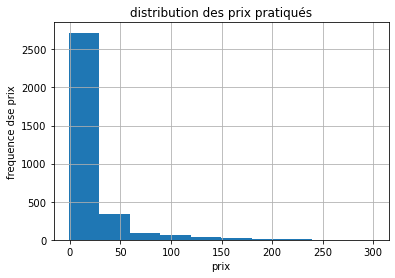

In [42]:
df_products['price'].hist() # Fonction puissance
plt.title('distribution des prix pratiqués')
plt.xlabel('prix')
plt.ylabel('frequence dse prix')
plt.savefig('distribution des prix')

0.25     6.99
0.50    13.06
0.75    22.99
Name: price, dtype: float64

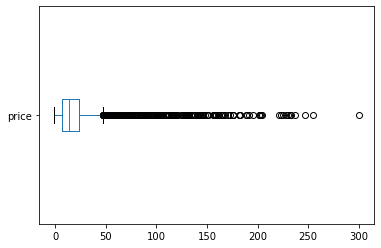

In [43]:
df_products['price'].plot(kind='box', vert=False)
df_products['price'].quantile([0.25, 0.5, 0.75])

In [44]:
# calcul de l'ecart interquartile IQ
IQ_products = describe_products.loc['75%', 'price'] - describe_products.loc['25%', 'price']
print(f'l\'écart interquartile est : {IQ_products:.2f}')
# outlier bas (Q1-1.5 IQ)
outlier_bas = describe_products.loc['25%', 'price'] - 1.5*IQ_products
print(f'la valeur de l\'outlier (moustache inferieur) est de: {outlier_bas:.2f}') # aucun outlier, le min étant -1

df_products[df_products['price'] < describe_products.loc['25%', 'price'] - 1.5*IQ_products] # aucun outlier

# outlier haut (Q3+1.5 IQ)
outlier_haut = (describe_products.loc['75%', 'price'] + 1.5*IQ_products)
print(f'la valeur de l\'outlier (moustache superieur) est de: {outlier_haut:.2f}') # max =300 (possible outlier donc)

df_products[df_products['price'] > describe_products.loc['75%', 'price'] + 1.5*IQ_products] # table des 302 outliers 
 

l'écart interquartile est : 16.00
la valeur de l'outlier (moustache inferieur) est de: -17.01
la valeur de l'outlier (moustache superieur) est de: 46.99


,id_prod,price,categ
10,2_228,225.17,2
11,1_178,51.92,1
38,2_100,72.11,2
49,1_48,47.22,1
64,2_89,107.99,2
...,...,...,...
3267,2_101,63.99,2
3269,1_543,51.99,1
3271,2_123,147.99,2
3279,1_331,55.99,1


In [45]:
df_products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [46]:
categ_0 = df_products[df_products['categ'] == 0]
categ_0.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
4,0_1507,3.99,0
5,0_1163,9.99,0


In [47]:
df_products.shape

(3287, 3)

In [48]:
df_products['letter_id'] = [x.split("_")[0] for x in df_products['id_prod']]
df_products

,id_prod,price,categ,letter_id
0,0_1421,19.99,0,0
1,0_1368,5.13,0,0
2,0_731,17.99,0,0
3,1_587,4.99,1,1
4,0_1507,3.99,0,0
...,...,...,...,...
3282,2_23,115.99,2,2
3283,0_146,17.14,0,0
3284,0_802,11.22,0,0
3285,1_140,38.56,1,1


In [49]:
df_products

,id_prod,price,categ,letter_id
0,0_1421,19.99,0,0
1,0_1368,5.13,0,0
2,0_731,17.99,0,0
3,1_587,4.99,1,1
4,0_1507,3.99,0,0
...,...,...,...,...
3282,2_23,115.99,2,2
3283,0_146,17.14,0,0
3284,0_802,11.22,0,0
3285,1_140,38.56,1,1


In [50]:
code = 0

for i in range(len(df_products)):
    if str(df_products['categ'][i]) == df_products['letter_id'][i]:
        code += 1
    else:
        code += 0
print(code)
df_products.shape[0]


3286


3287

In [51]:
for x in list(df_products['letter_id']):
    if x in ['0', '1', '2']:
        pass
    else :
        print(x)

T


In [52]:
df_products['id_prod'].str.split("_").shape

(3287,)

In [53]:
del(df_products['letter_id'])

In [54]:
# valeurs atypiques , choix est fait de garder ces valeurs.
df_products.head()
df_products.shape


(3287, 3)

## Nettoyage données clients

In [55]:
df_customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [56]:
df_customers.duplicated().sum() # pas de lignes dupliquées

0

In [57]:
df_customers.isnull().sum() # pas de valeurs manquantes

client_id    0
sex          0
birth        0
dtype: int64

In [58]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [59]:
df_customers['birth'].unique()

array([1967, 1975, 1984, 1962, 1943, 1993, 1978, 1971, 1982, 1945, 2003,
       1959, 1977, 1954, 1987, 2000, 1992, 1963, 1958, 1994, 1936, 1986,
       1942, 1970, 1957, 1968, 2002, 2004, 1979, 1974, 1964, 1951, 1937,
       1981, 1965, 1960, 1996, 1983, 1990, 1955, 1988, 1991, 1972, 1980,
       1989, 1976, 1985, 1953, 1998, 1956, 1948, 1973, 1969, 1938, 1995,
       1952, 1949, 1999, 2001, 1939, 1950, 1966, 1935, 1941, 1961, 1997,
       1944, 1929, 1947, 1946, 1932, 1931, 1933, 1930, 1940, 1934])

In [60]:
df_customers['birth'].nunique()

76

In [61]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


## Merge des DataFrames

### Merge table transactions et produits

In [62]:
df_transactions.head()

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242


In [63]:
df_products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [64]:
# merge des datasets des ventes et des produits (en outer, sur toutes les lignes des deux DataFrame a joindre)
# le paramètre 'indicator' indique ici de quelle table provient l'information

main_df = pd.DataFrame.merge(df_transactions, df_products, how='outer', on='id_prod', indicator = True) # outer
main_df.head()


,id_prod,date,session_id,client_id,price,categ,_merge
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,both
1,0_1483,2021-10-18 19:16:14.767807,s_106741,c_1576,4.99,0.0,both
2,0_1483,2021-11-14 11:11:45.276771,s_119491,c_182,4.99,0.0,both
3,0_1483,2021-07-30 19:37:16.087057,s_69222,c_1196,4.99,0.0,both
4,0_1483,2021-03-30 14:18:13.403218,s_13545,c_2890,4.99,0.0,both


In [65]:
main_df.shape # taille jointure au niveau des ventes et des produits 'outer'

(336912, 7)

In [66]:
main_df['_merge'].value_counts()

both          336787
left_only        103
right_only        22
Name: _merge, dtype: int64

In [67]:
main_df['_merge'].unique()

['both', 'left_only', 'right_only']
Categories (3, object): ['both', 'left_only', 'right_only']

####  <a> Produit n'ayant fait l'objet d'aucune transaction </a>

In [68]:
# produit qui n'ont fait l'objet d'aucune transaction
df_no_transact = main_df[main_df['_merge'] == 'right_only']
df_no_transact.head()

,id_prod,date,session_id,client_id,price,categ,_merge
336890,0_1016,NaT,NaN,NaN,35.06,0.0,right_only
336891,0_1780,NaT,NaN,NaN,1.67,0.0,right_only
336892,0_1062,NaT,NaN,NaN,20.08,0.0,right_only
336893,0_1119,NaT,NaN,NaN,2.99,0.0,right_only
336894,0_1014,NaT,NaN,NaN,1.15,0.0,right_only


In [69]:
# produit qui n'ont fait l'objet d'aucune transaction
df_no_transact.shape[0]


22

In [70]:
# produit qui n'ont fait l'objet d'aucune transaction
df_no_transact['id_prod'].nunique()
print(
    f"{df_no_transact['id_prod'].nunique()} livres n'ont fait l'objet d'aucune vente")
not_sell = df_no_transact['categ'].value_counts()
print(f"dont {not_sell[0]} livres de categorie 0, {not_sell[2]} livres de categorie 1, {not_sell[1]} livres de categorie 2")

22 livres n'ont fait l'objet d'aucune vente
dont 17 livres de categorie 0, 3 livres de categorie 1, 2 livres de categorie 2


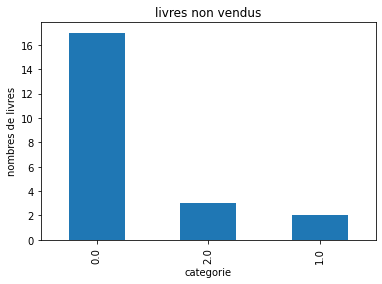

In [71]:
not_sell.plot(kind='bar')
plt.xlabel('categorie')
plt.ylabel('nombres de livres')
plt.title('livres non vendus')
plt.savefig('livres_non_vendus.png', bbox_inches='tight', edgecolor='w')
plt.show()

In [72]:
not_sell.head()

0.0    17
2.0     3
1.0     2
Name: categ, dtype: int64

In [73]:
df_no_transact.head()

,id_prod,date,session_id,client_id,price,categ,_merge
336890,0_1016,NaT,NaN,NaN,35.06,0.0,right_only
336891,0_1780,NaT,NaN,NaN,1.67,0.0,right_only
336892,0_1062,NaT,NaN,NaN,20.08,0.0,right_only
336893,0_1119,NaT,NaN,NaN,2.99,0.0,right_only
336894,0_1014,NaT,NaN,NaN,1.15,0.0,right_only


In [74]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336912 entries, 0 to 336911
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     336912 non-null  object        
 1   date        336816 non-null  datetime64[ns]
 2   session_id  336890 non-null  object        
 3   client_id   336890 non-null  object        
 4   price       336809 non-null  float64       
 5   categ       336809 non-null  float64       
 6   _merge      336912 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(2), object(3)
memory usage: 18.3+ MB


In [75]:
main_df[main_df.duplicated()].head() #recherche des lignes en double à supprimer puis les supp. puis les nan ? les NaT eventuellement...


,id_prod,date,session_id,client_id,price,categ,_merge
226629,T_0,NaT,s_0,ct_1,-1.0,0.0,both
226630,T_0,NaT,s_0,ct_1,-1.0,0.0,both
226632,T_0,NaT,s_0,ct_1,-1.0,0.0,both
226633,T_0,NaT,s_0,ct_0,-1.0,0.0,both
226634,T_0,NaT,s_0,ct_0,-1.0,0.0,both


In [76]:
main_df[main_df.duplicated()]['date'].unique()

array(['NaT'], dtype='datetime64[ns]')

In [77]:
# 2 lignes tests dupliquées sont à supp.

main_df[main_df.duplicated()].drop(columns='date').value_counts() 

# la fonction value_counts ne fonctionne pas avec les NaN/NaT d'où la suppression de la colonne [date]

id_prod  session_id  client_id  price  categ  _merge
T_0      s_0         ct_0       -1.0   0.0    both      36
                     ct_1       -1.0   0.0    both      36
dtype: int64

In [78]:
main_df[main_df.duplicated()]['client_id'].unique()

array(['ct_1', 'ct_0'], dtype=object)

In [79]:
# On supp les doublons
main_df.drop_duplicates(inplace=True)
main_df.head()

,id_prod,date,session_id,client_id,price,categ,_merge
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,both
1,0_1483,2021-10-18 19:16:14.767807,s_106741,c_1576,4.99,0.0,both
2,0_1483,2021-11-14 11:11:45.276771,s_119491,c_182,4.99,0.0,both
3,0_1483,2021-07-30 19:37:16.087057,s_69222,c_1196,4.99,0.0,both
4,0_1483,2021-03-30 14:18:13.403218,s_13545,c_2890,4.99,0.0,both


In [80]:
main_df.info() # verifions les valeus nulles ou les NaN

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336840 entries, 0 to 336911
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     336840 non-null  object        
 1   date        336816 non-null  datetime64[ns]
 2   session_id  336818 non-null  object        
 3   client_id   336818 non-null  object        
 4   price       336737 non-null  float64       
 5   categ       336737 non-null  float64       
 6   _merge      336840 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(2), object(3)
memory usage: 18.3+ MB


In [81]:
# 22 livres ne faisant partie d'aucune transaction seront supp pour être analysés séparement(fait plus haut)
# 103 transactions n'ont ni prix ni categorie
main_df.isna().sum()


id_prod         0
date           24
session_id     22
client_id      22
price         103
categ         103
_merge          0
dtype: int64

In [82]:
# supp des livres ne faisant l'objet d'aucune transaction
# Ces livres se trouvent dans le df : df_no_transact
main_df = main_df[main_df['_merge'].isin(['both', 'left_only'])]
main_df

,id_prod,date,session_id,client_id,price,categ,_merge
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,both
1,0_1483,2021-10-18 19:16:14.767807,s_106741,c_1576,4.99,0.0,both
2,0_1483,2021-11-14 11:11:45.276771,s_119491,c_182,4.99,0.0,both
3,0_1483,2021-07-30 19:37:16.087057,s_69222,c_1196,4.99,0.0,both
4,0_1483,2021-03-30 14:18:13.403218,s_13545,c_2890,4.99,0.0,both
...,...,...,...,...,...,...,...
336885,0_1683,2021-12-24 04:37:46.407713,s_139091,c_5508,2.99,0.0,both
336886,2_98,2021-03-08 21:10:32.250919,s_3637,c_5967,149.74,2.0,both
336887,0_833,2021-09-27 23:22:40.394509,s_96558,c_8260,2.99,0.0,both
336888,0_1284,2021-04-14 13:13:06.560397,s_20477,c_1551,1.38,0.0,both


In [83]:
# Analysons les livres sans prix et sans categories
df_livres_no_price = main_df[main_df['price'].isnull()]
df_livres_no_price # Nous allons remplacer les prix manquants par le prix médian pour ne pas perdre de l'information par la suite


,id_prod,date,session_id,client_id,price,categ,_merge
307865,0_2245,2021-06-17 03:03:12.668129,s_49705,c_1533,NaN,NaN,left_only
307866,0_2245,2021-06-16 05:53:01.627491,s_49323,c_7954,NaN,NaN,left_only
307867,0_2245,2021-11-24 17:35:59.911427,s_124474,c_5120,NaN,NaN,left_only
307868,0_2245,2022-02-28 18:08:49.875709,s_172304,c_4964,NaN,NaN,left_only
307869,0_2245,2021-03-01 00:09:29.301897,s_3,c_580,NaN,NaN,left_only
...,...,...,...,...,...,...,...
307963,0_2245,2021-04-06 19:59:19.462288,s_16936,c_4167,NaN,NaN,left_only
307964,0_2245,2021-03-30 23:29:02.347672,s_13738,c_7790,NaN,NaN,left_only
307965,0_2245,2021-12-03 14:14:40.444177,s_128815,c_6189,NaN,NaN,left_only
307966,0_2245,2021-04-27 18:58:47.703374,s_26624,c_1595,NaN,NaN,left_only


In [84]:
array_livres_no_price = df_livres_no_price['id_prod'].unique()
array_livres_no_price

#un livre n'a ni prix, ni categorie mais a fait l'objet de 103 transactions
# il lui sera affecté le prix médian des livres de la catégorie 0
# il lui nsera affecté la catégorie 0 qui correspond au 1 er chiffre de son identifiant produit



array(['0_2245'], dtype=object)

In [85]:
main_df['id_prod'].value_counts() # visualisation rapide du niveau des transactions par produit


1_369     1081
1_417     1062
1_498     1036
1_414     1027
1_425     1013
          ... 
0_94         1
0_1151       1
0_568        1
2_23         1
0_1582       1
Name: id_prod, Length: 3266, dtype: int64

In [86]:
df_livres_no_price['id_prod'].nunique()

1

In [87]:
main_df.shape

(336818, 7)

In [88]:
df_products['price'].median()

13.06

In [89]:
# calculons le prix median des livres de categ 0 à imputer au produit '0_2245'
median_price_categ0 = df_products[df_products['categ'] == 0]['price'].median()
median_price_categ0

10.32

In [90]:
main_df['price'].fillna(median_price_categ0, axis=0, inplace=True)
main_df

,id_prod,date,session_id,client_id,price,categ,_merge
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,both
1,0_1483,2021-10-18 19:16:14.767807,s_106741,c_1576,4.99,0.0,both
2,0_1483,2021-11-14 11:11:45.276771,s_119491,c_182,4.99,0.0,both
3,0_1483,2021-07-30 19:37:16.087057,s_69222,c_1196,4.99,0.0,both
4,0_1483,2021-03-30 14:18:13.403218,s_13545,c_2890,4.99,0.0,both
...,...,...,...,...,...,...,...
336885,0_1683,2021-12-24 04:37:46.407713,s_139091,c_5508,2.99,0.0,both
336886,2_98,2021-03-08 21:10:32.250919,s_3637,c_5967,149.74,2.0,both
336887,0_833,2021-09-27 23:22:40.394509,s_96558,c_8260,2.99,0.0,both
336888,0_1284,2021-04-14 13:13:06.560397,s_20477,c_1551,1.38,0.0,both


In [91]:
main_df.isnull().sum() # Verifions que les données manquantes ont bel et bien été remplacées

id_prod         0
date            2
session_id      0
client_id       0
price           0
categ         103
_merge          0
dtype: int64

In [92]:
# imputons la categorie 0 au produit '0_2245'
main_df['categ'].fillna(0, inplace=True)
main_df.isnull().sum()

id_prod       0
date          2
session_id    0
client_id     0
price         0
categ         0
_merge        0
dtype: int64

### Merge table customer

In [93]:
df_customers.head(1)

,client_id,sex,birth
0,c_4410,f,1967


In [94]:
main_df.rename(columns={'_merge': 'first_merge'}, inplace=True)
main_df

,id_prod,date,session_id,client_id,price,categ,first_merge
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,both
1,0_1483,2021-10-18 19:16:14.767807,s_106741,c_1576,4.99,0.0,both
2,0_1483,2021-11-14 11:11:45.276771,s_119491,c_182,4.99,0.0,both
3,0_1483,2021-07-30 19:37:16.087057,s_69222,c_1196,4.99,0.0,both
4,0_1483,2021-03-30 14:18:13.403218,s_13545,c_2890,4.99,0.0,both
...,...,...,...,...,...,...,...
336885,0_1683,2021-12-24 04:37:46.407713,s_139091,c_5508,2.99,0.0,both
336886,2_98,2021-03-08 21:10:32.250919,s_3637,c_5967,149.74,2.0,both
336887,0_833,2021-09-27 23:22:40.394509,s_96558,c_8260,2.99,0.0,both
336888,0_1284,2021-04-14 13:13:06.560397,s_20477,c_1551,1.38,0.0,both


In [95]:
main_df = pd.DataFrame.merge(main_df, df_customers, how='outer', on='client_id', indicator=True)
main_df

,id_prod,date,session_id,client_id,price,categ,first_merge,sex,birth,_merge
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,both,f,1977,both
1,0_1085,2021-09-29 11:14:59.793823,s_97382,c_4450,3.99,0.0,both,f,1977,both
2,0_1453,2021-08-27 19:50:46.796939,s_81509,c_4450,7.99,0.0,both,f,1977,both
3,0_1405,2021-08-27 20:07:25.878440,s_81509,c_4450,4.99,0.0,both,f,1977,both
4,0_1392,2021-12-28 11:45:04.072281,s_141302,c_4450,6.30,0.0,both,f,1977,both
...,...,...,...,...,...,...,...,...,...,...
336834,NaN,NaT,NaN,c_862,NaN,NaN,NaN,f,1956,right_only
336835,NaN,NaT,NaN,c_7584,NaN,NaN,NaN,f,1960,right_only
336836,NaN,NaT,NaN,c_90,NaN,NaN,NaN,m,2001,right_only
336837,NaN,NaT,NaN,c_587,NaN,NaN,NaN,m,1993,right_only


##### Clients aucune transaction

In [96]:
# On a des clients qui n'ont fait l'objet d'aucune transaction
main_df.isna().sum()

id_prod        21
date           23
session_id     21
client_id       0
price          21
categ          21
first_merge    21
sex             0
birth           0
_merge          0
dtype: int64

In [97]:
# Clients qui n'ont acheté aucun produits
main_df['_merge'].unique()
client_no_achats = main_df[main_df['_merge'] == 'right_only']
client_no_achats.head()

,id_prod,date,session_id,client_id,price,categ,first_merge,sex,birth,_merge
336818,NaN,NaT,NaN,c_8253,NaN,NaN,NaN,f,2001,right_only
336819,NaN,NaT,NaN,c_3789,NaN,NaN,NaN,f,1997,right_only
336820,NaN,NaT,NaN,c_4406,NaN,NaN,NaN,f,1998,right_only
336821,NaN,NaT,NaN,c_2706,NaN,NaN,NaN,f,1967,right_only
336822,NaN,NaT,NaN,c_3443,NaN,NaN,NaN,m,1959,right_only


In [98]:
main_df[main_df['_merge'] == 'right_only'].shape

(21, 10)

In [99]:
client_no_achats['client_id'].nunique() # 21 clients unique n'ont achetés aucun livre durant l'année étudiée (2021-2022)


21

In [100]:
main_df.head()

,id_prod,date,session_id,client_id,price,categ,first_merge,sex,birth,_merge
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,both,f,1977,both
1,0_1085,2021-09-29 11:14:59.793823,s_97382,c_4450,3.99,0.0,both,f,1977,both
2,0_1453,2021-08-27 19:50:46.796939,s_81509,c_4450,7.99,0.0,both,f,1977,both
3,0_1405,2021-08-27 20:07:25.878440,s_81509,c_4450,4.99,0.0,both,f,1977,both
4,0_1392,2021-12-28 11:45:04.072281,s_141302,c_4450,6.30,0.0,both,f,1977,both


In [101]:
main_df['date'].max() - main_df['date'].min() 

Timedelta('364 days 23:58:50.197334')

In [102]:
main_df['date'].min() 

Timestamp('2021-03-01 00:01:07.843138')

In [103]:
main_df['date'].max()

Timestamp('2022-02-28 23:59:58.040472')

In [104]:
client_no_achats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 336818 to 336838
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id_prod      0 non-null      object        
 1   date         0 non-null      datetime64[ns]
 2   session_id   0 non-null      object        
 3   client_id    21 non-null     object        
 4   price        0 non-null      float64       
 5   categ        0 non-null      float64       
 6   first_merge  0 non-null      category      
 7   sex          21 non-null     object        
 8   birth        21 non-null     int64         
 9   _merge       21 non-null     category      
dtypes: category(2), datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 1.8+ KB


In [105]:
cd P4_02_graphiques/

[Errno 2] No such file or directory: 'P4_02_graphiques/'
/Users/michelabessolo/Desktop/OC/P4/P4_abessolo_michel/P4_01_données_et_analyses


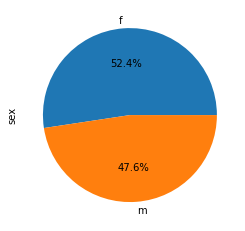

In [106]:
client_no_achats['sex'].value_counts().plot(kind='pie', autopct = '%1.1f%%')
plt.savefig('clients_aucun_achat.png')

In [107]:
main_df.head()

,id_prod,date,session_id,client_id,price,categ,first_merge,sex,birth,_merge
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,both,f,1977,both
1,0_1085,2021-09-29 11:14:59.793823,s_97382,c_4450,3.99,0.0,both,f,1977,both
2,0_1453,2021-08-27 19:50:46.796939,s_81509,c_4450,7.99,0.0,both,f,1977,both
3,0_1405,2021-08-27 20:07:25.878440,s_81509,c_4450,4.99,0.0,both,f,1977,both
4,0_1392,2021-12-28 11:45:04.072281,s_141302,c_4450,6.30,0.0,both,f,1977,both


In [108]:
main_df['_merge'].value_counts()

both          336818
right_only        21
left_only          0
Name: _merge, dtype: int64

In [109]:
# supprimons les clients qui n'ont achetés aucun livre durant l'année étudiée de la base de données des transactions
main_df = main_df[main_df['_merge'] == 'both']
main_df.head()

,id_prod,date,session_id,client_id,price,categ,first_merge,sex,birth,_merge
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,both,f,1977,both
1,0_1085,2021-09-29 11:14:59.793823,s_97382,c_4450,3.99,0.0,both,f,1977,both
2,0_1453,2021-08-27 19:50:46.796939,s_81509,c_4450,7.99,0.0,both,f,1977,both
3,0_1405,2021-08-27 20:07:25.878440,s_81509,c_4450,4.99,0.0,both,f,1977,both
4,0_1392,2021-12-28 11:45:04.072281,s_141302,c_4450,6.30,0.0,both,f,1977,both


In [110]:
main_df[main_df.duplicated()] # pas de ligne en doublons

,id_prod,date,session_id,client_id,price,categ,first_merge,sex,birth,_merge


In [111]:
main_df[main_df['date'].duplicated()] # pas de date en doublons

,id_prod,date,session_id,client_id,price,categ,first_merge,sex,birth,_merge
336769,T_0,NaT,s_0,ct_0,-1.0,0.0,both,f,2001,both


In [112]:
main_df.info()  # Dataframe utilisé comme base de donnée principale de nos analyses

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336818 entries, 0 to 336817
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   id_prod      336818 non-null  object        
 1   date         336816 non-null  datetime64[ns]
 2   session_id   336818 non-null  object        
 3   client_id    336818 non-null  object        
 4   price        336818 non-null  float64       
 5   categ        336818 non-null  float64       
 6   first_merge  336818 non-null  category      
 7   sex          336818 non-null  object        
 8   birth        336818 non-null  int64         
 9   _merge       336818 non-null  category      
dtypes: category(2), datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 23.8+ MB


In [113]:
main_df.isnull().sum()

id_prod        0
date           2
session_id     0
client_id      0
price          0
categ          0
first_merge    0
sex            0
birth          0
_merge         0
dtype: int64

In [114]:
main_df[main_df['date'].isnull()] # date test à supprimer

,id_prod,date,session_id,client_id,price,categ,first_merge,sex,birth,_merge
336768,T_0,NaT,s_0,ct_1,-1.0,0.0,both,m,2001,both
336769,T_0,NaT,s_0,ct_0,-1.0,0.0,both,f,2001,both


In [115]:
main_df.dropna(axis=0, inplace=True)
main_df.isnull().sum()

/var/folders/b5/6wc9kpm138l0bt8lxhymh7l00000gn/T/ipykernel_17553/216843729.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df.dropna(axis=0, inplace=True)


id_prod        0
date           0
session_id     0
client_id      0
price          0
categ          0
first_merge    0
sex            0
birth          0
_merge         0
dtype: int64

In [116]:
main_df.shape

(336816, 10)

In [117]:
main_df.head(4)

,id_prod,date,session_id,client_id,price,categ,first_merge,sex,birth,_merge
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,both,f,1977,both
1,0_1085,2021-09-29 11:14:59.793823,s_97382,c_4450,3.99,0.0,both,f,1977,both
2,0_1453,2021-08-27 19:50:46.796939,s_81509,c_4450,7.99,0.0,both,f,1977,both
3,0_1405,2021-08-27 20:07:25.878440,s_81509,c_4450,4.99,0.0,both,f,1977,both


In [118]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336816 entries, 0 to 336817
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   id_prod      336816 non-null  object        
 1   date         336816 non-null  datetime64[ns]
 2   session_id   336816 non-null  object        
 3   client_id    336816 non-null  object        
 4   price        336816 non-null  float64       
 5   categ        336816 non-null  float64       
 6   first_merge  336816 non-null  category      
 7   sex          336816 non-null  object        
 8   birth        336816 non-null  int64         
 9   _merge       336816 non-null  category      
dtypes: category(2), datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 23.8+ MB


## <a > - Représentez la distribution empirique d'une variable</a>



### Repartion des genres

In [119]:
main_df['sex'].shape

(336816,)

In [120]:
df_customers['sex'].shape

(8623,)

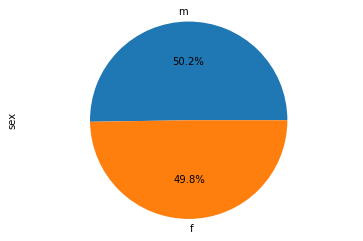

In [121]:
plt.figure()
main_df['sex'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.axis('equal')
plt.savefig('clients_sexe_pie.png')
plt.show() #  la repartition des client.es en genre est pratiquement la même entre hommes et femmes


#### Analyse du produit

In [122]:
main_df['id_prod'].mode() # le produit correspondant à l'id_prod : 1_369 est le plus vendu

0    1_369
dtype: object

In [123]:
# Top produit sur 3265 produits unique
main_df['id_prod'].value_counts().head(5)

1_369    1081
1_417    1062
1_498    1036
1_414    1027
1_425    1013
Name: id_prod, dtype: int64

In [124]:
# Flop produits 
main_df['id_prod'].value_counts().tail(5)

# Les flops : Voir les produits qui n'ont fait l'objet d'aucune ventes dans la partie merge (transaction#Product)

1_402     1
0_1074    1
0_1601    1
0_541     1
0_1582    1
Name: id_prod, dtype: int64

In [125]:
tab_products = pd.DataFrame(main_df['id_prod'].value_counts())
tab_products['freq_product'] = main_df['id_prod'].value_counts() / main_df['id_prod'].shape[0]
tab_products['freq_cumul'] = tab_products['freq_product'].cumsum()
tab_products

,id_prod,freq_product,freq_cumul
1_369,1081,0.003209,0.003209
1_417,1062,0.003153,0.006363
1_498,1036,0.003076,0.009438
1_414,1027,0.003049,0.012488
1_425,1013,0.003008,0.015495
...,...,...,...
1_402,1,0.000003,0.999988
0_1074,1,0.000003,0.999991
0_1601,1,0.000003,0.999994
0_541,1,0.000003,0.999997


In [126]:
 # le mode pour les clients de sexe feminin 
main_df.loc[main_df['sex'] == 'f', :]['id_prod'].mode()


0    1_369
dtype: object

In [127]:
 # le mode pour les clients de sexe masculin
main_df.loc[main_df['sex'] == 'm', :]['id_prod'].mode()

0    1_417
dtype: object

- <a> Toutefois on peut remarquer à ce niveau que  les 5 produits les plus vendus sont les mêmes independamment du sexe. En effet :
</a>


In [128]:
main_df.loc[main_df['sex'] == 'f', :]['id_prod'].value_counts()

1_369     550
1_417     523
1_425     521
1_498     518
1_414     517
         ... 
2_82        1
0_1498      1
0_1122      1
0_1803      1
0_495       1
Name: id_prod, Length: 3177, dtype: int64

In [129]:
main_df.loc[main_df['sex'] == 'm', :]['id_prod'].value_counts()

1_417     539
1_369     531
1_498     518
1_414     510
1_425     492
         ... 
1_159       1
1_402       1
0_1765      1
0_1251      1
1_390       1
Name: id_prod, Length: 3179, dtype: int64

- A priori nous observons à cette étape qu'il n'y a pas de différences significatives en fonctions du genre dans le choix des produits achetés (à confirmer par une analyse bivariée khi-deux)

In [130]:
# 3265 produits unique
main_df['id_prod'].nunique() # rep graphique serait sans intérêt compte tenu du nombre de modalités de cette variable


3265

In [131]:
df_products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


#### Analyse des sessions

In [132]:
# y'a t-il une/des session(s) en particulier(s) qui sort(ent) du lot
main_df['session_id'].mode()

0    s_118668
dtype: object

In [133]:
df_transactions.head()

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242


In [134]:
# Top sessions
main_df[['session_id']].value_counts(normalize=False)

session_id
s_118668      14
s_96857       13
s_21005       13
s_93892       12
s_168560      12
              ..
s_31269        1
s_31268        1
s_122376       1
s_31266        1
s_1            1
Length: 169194, dtype: int64

In [135]:
main_df['session_id'].nunique() # il y'a beaucoup trop de session pour une representation graphique pertinente


169194

#### Quelques  analyses sur les clients

In [136]:
# y'a t-il un client dont dépend nos ventes ? On pourrait approfondir cela en verifiant le volume des transactions\n
# pour ce client
main_df['client_id'].mode()

0    c_1609
dtype: object

In [137]:
main_df.head(2)

,id_prod,date,session_id,client_id,price,categ,first_merge,sex,birth,_merge
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,both,f,1977,both
1,0_1085,2021-09-29 11:14:59.793823,s_97382,c_4450,3.99,0.0,both,f,1977,both


In [138]:
main_df['client_id'].value_counts(normalize = False)

c_1609    12855
c_6714     4473
c_3454     3275
c_4958     2562
c_2140      195
          ...  
c_6200        1
c_8351        1
c_4679        1
c_6610        1
c_8140        1
Name: client_id, Length: 8600, dtype: int64

In [139]:
main_df.shape

(336816, 10)

In [140]:
main_df[main_df['client_id'] == 'c_4450']

,id_prod,date,session_id,client_id,price,categ,first_merge,sex,birth,_merge
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,both,f,1977,both
1,0_1085,2021-09-29 11:14:59.793823,s_97382,c_4450,3.99,0.0,both,f,1977,both
2,0_1453,2021-08-27 19:50:46.796939,s_81509,c_4450,7.99,0.0,both,f,1977,both
3,0_1405,2021-08-27 20:07:25.878440,s_81509,c_4450,4.99,0.0,both,f,1977,both
4,0_1392,2021-12-28 11:45:04.072281,s_141302,c_4450,6.30,0.0,both,f,1977,both
...,...,...,...,...,...,...,...,...,...,...
95,0_160,2021-09-24 08:45:03.495786,s_94684,c_4450,9.12,0.0,both,f,1977,both
96,0_1859,2021-08-05 17:15:47.133685,s_71777,c_4450,4.99,0.0,both,f,1977,both
97,0_935,2021-08-07 14:17:14.551254,s_72586,c_4450,3.99,0.0,both,f,1977,both
98,1_390,2021-10-30 09:46:51.183163,s_112221,c_4450,8.58,1.0,both,f,1977,both


In [141]:
main_df[main_df['client_id'] == 'c_4450'].groupby('session_id').count()


,id_prod,date,client_id,price,categ,first_merge,sex,birth,_merge
session_id,,,,,,,,,
s_104825,1,1,1,1,1,1,1,1,1
s_107003,2,2,2,2,2,2,2,2,2
s_110664,1,1,1,1,1,1,1,1,1
s_112221,1,1,1,1,1,1,1,1,1
s_113128,1,1,1,1,1,1,1,1,1
s_119043,3,3,3,3,3,3,3,3,3
s_122895,2,2,2,2,2,2,2,2,2
s_125169,2,2,2,2,2,2,2,2,2
s_130397,1,1,1,1,1,1,1,1,1


limit_output extension: Maximum message size of 5000 exceeded with 9375 characters

In [142]:
main_df[main_df['session_id'] == 's_97382']

,id_prod,date,session_id,client_id,price,categ,first_merge,sex,birth,_merge
1,0_1085,2021-09-29 11:14:59.793823,s_97382,c_4450,3.99,0.0,both,f,1977,both
8,0_2232,2021-09-29 11:09:40.816793,s_97382,c_4450,8.94,0.0,both,f,1977,both
14,0_1142,2021-09-29 11:22:56.458622,s_97382,c_4450,3.42,0.0,both,f,1977,both


In [143]:
# Top session
main_df.groupby('session_id')['client_id'].count().sort_values(ascending=False)


session_id
s_118668    14
s_96857     13
s_21005     13
s_93892     12
s_168560    12
            ..
s_31269      1
s_31268      1
s_122376     1
s_31266      1
s_1          1
Name: client_id, Length: 169194, dtype: int64

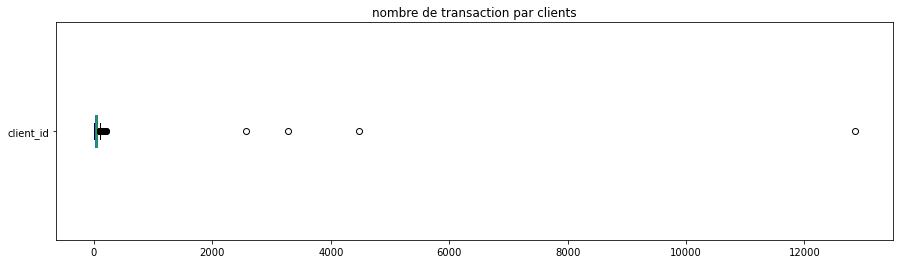

In [144]:
plt.title('nombre de transaction par clients')
main_df['client_id'].value_counts(normalize = False).plot(kind='box' ,figsize=(15,4), vert=False)
plt.savefig('nombre de transaction par clients_boxplot')

In [145]:
# nombre de commande en moyenne
main_df['client_id'].value_counts(normalize = False).mean()


39.1646511627907

In [146]:
# nombre de commande median
main_df['client_id'].value_counts(normalize = False).median()

25.0

In [147]:
# Top clients (+ de 2000 commandes):
main_df['client_id'].value_counts(normalize = False)[0:4]

c_1609    12855
c_6714     4473
c_3454     3275
c_4958     2562
Name: client_id, dtype: int64

Le panier moyen sans les clients à plus de 2000 commandes
est de 36.48801768264309


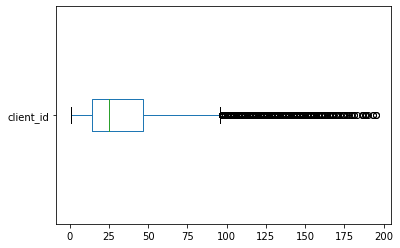

In [148]:
main_df['client_id'].value_counts(normalize = False)[4:].plot(kind='box', vert=False)
print(f"Le panier moyen sans les clients à plus de 2000 commandes\nest de {main_df['client_id'].value_counts(normalize = False)[4:].mean()}")
# sans les tops clients (Plus de 2000 commandes)

In [149]:
main_df['client_id'].nunique()
# pas de representation graphique (axe des x illisibles) mais possible representation sous forme de tableau

8600

In [150]:
tab_clients_values = main_df['client_id'].value_counts()
tab_clients_values.head(10) # 191 valeur nunique, faire un grouby, afficher une distr

c_1609    12855
c_6714     4473
c_3454     3275
c_4958     2562
c_2140      195
c_7959      195
c_8026      193
c_2595      193
c_3725      190
c_8392      189
Name: client_id, dtype: int64

In [151]:
tab_clients_values = pd.DataFrame(tab_clients_values)
tab_clients_values['freq_clients'] = tab_clients_values['client_id'] / len(main_df)
tab_clients_values['freq_cumul'] = tab_clients_values['freq_clients'].cumsum()
tab_clients_values

,client_id,freq_clients,freq_cumul
c_1609,12855,0.038166,0.038166
c_6714,4473,0.013280,0.051446
c_3454,3275,0.009723,0.061170
c_4958,2562,0.007607,0.068776
c_2140,195,0.000579,0.069355
...,...,...,...
c_6200,1,0.000003,0.999988
c_8351,1,0.000003,0.999991
c_4679,1,0.000003,0.999994
c_6610,1,0.000003,0.999997


In [152]:
tab_clients_values['client_id'].mean()

39.1646511627907

In [153]:
# Les clients dont les commandes sont supérieures à la moyenne
tab_clients_values[tab_clients_values['client_id'] > 40]


,client_id,freq_clients,freq_cumul
c_1609,12855,0.038166,0.038166
c_6714,4473,0.013280,0.051446
c_3454,3275,0.009723,0.061170
c_4958,2562,0.007607,0.068776
c_2140,195,0.000579,0.069355
...,...,...,...
c_4111,41,0.000122,0.662198
c_2165,41,0.000122,0.662320
c_5716,41,0.000122,0.662442
c_530,41,0.000122,0.662564


In [154]:
(2590 / 8600) * 100
print("30% des clients ont commandé plus de 40 produits cette année avec un top 5")

30% des clients ont commandé plus de 40 produits cette année avec un top 5


Text(0.5, 1.0, 'distribution du nombre de transaction par client')

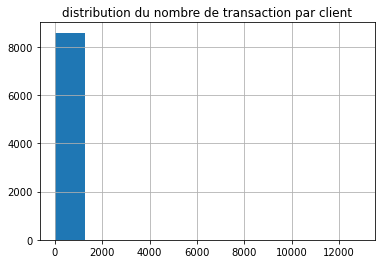

In [155]:
main_df['client_id'].value_counts().hist()
plt.title('distribution du nombre de transaction par client')

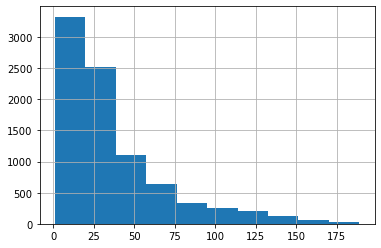

In [156]:
tab_clients_values_plot = main_df['client_id'].value_counts()[10:].hist()
# loi de puissance (hypothèse de normalité rejetée dans ce cas), la majorité des clients font de très petites transaction (1 achat par ex.)

In [157]:
main_df.shape

(336816, 10)

In [158]:
main_df['client_id'].isnull().sum()

0

In [159]:
tab_clients_values

,client_id,freq_clients,freq_cumul
c_1609,12855,0.038166,0.038166
c_6714,4473,0.013280,0.051446
c_3454,3275,0.009723,0.061170
c_4958,2562,0.007607,0.068776
c_2140,195,0.000579,0.069355
...,...,...,...
c_6200,1,0.000003,0.999988
c_8351,1,0.000003,0.999991
c_4679,1,0.000003,0.999994
c_6610,1,0.000003,0.999997


In [160]:
# determinons les categories de livres les  plus vendus
main_df['categ'].value_counts(normalize=True)
#  les livres  de la categories 0 sont  les  plus  vendus (  environ 2/3 des transactions)

0.0    0.622087
1.0    0.325801
2.0    0.052112
Name: categ, dtype: float64

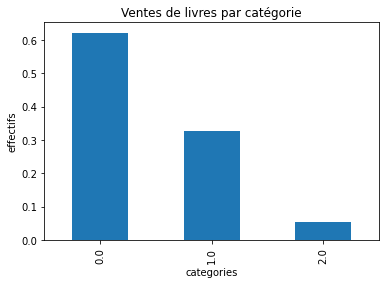

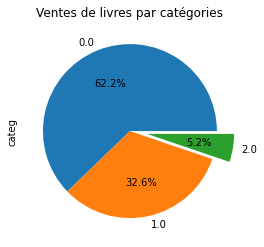

<Figure size 432x288 with 0 Axes>

In [161]:
# representation graphique
main_df['categ'].value_counts(normalize=True).plot(kind='bar')  # diagramme en tuyaux d'orgues 
plt.xlabel('categories')
plt.ylabel('effectifs')
plt.title('Ventes de livres par catégorie')
plt.savefig('ventes_par_categorie_bar.png')
plt.show()

main_df['categ'].value_counts(normalize=True).plot(kind='pie', autopct = '%1.1f%%', explode = [0, 0, 0.2], title = 'Ventes de livres par catégories')  #  diagramme en bâtons
plt.show()
plt.savefig('ventes_par_categorie_pie.png')


In [162]:
main_df.head()

,id_prod,date,session_id,client_id,price,categ,first_merge,sex,birth,_merge
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,both,f,1977,both
1,0_1085,2021-09-29 11:14:59.793823,s_97382,c_4450,3.99,0.0,both,f,1977,both
2,0_1453,2021-08-27 19:50:46.796939,s_81509,c_4450,7.99,0.0,both,f,1977,both
3,0_1405,2021-08-27 20:07:25.878440,s_81509,c_4450,4.99,0.0,both,f,1977,both
4,0_1392,2021-12-28 11:45:04.072281,s_141302,c_4450,6.30,0.0,both,f,1977,both


In [163]:
main_df['birth'].nunique()

76

In [164]:
main_df['birth'].isnull().sum()

0

In [165]:
main_df['birth'].max()

2004

In [166]:
main_df['birth'].min()

1929

In [167]:
main_df['birth'].value_counts()

1980    23880
1979    12424
1988    12408
1978    12279
1986    11824
        ...  
1932      159
1935      144
1930      115
1929       86
1931       84
Name: birth, Length: 76, dtype: int64

In [168]:
main_df['birth'].unique()

array([1977, 1956, 1984, 1980, 1982, 1979, 1964, 1978, 1975, 1987, 1989,
       1968, 1988, 1957, 1974, 1973, 1953, 1986, 1983, 1981, 1937, 1995,
       1972, 1960, 1976, 1990, 1991, 1949, 1967, 1959, 1962, 1965, 1996,
       1985, 1950, 1999, 1993, 1954, 1969, 1948, 2004, 1992, 1970, 1963,
       1938, 1971, 1958, 1951, 1947, 1945, 1966, 2000, 1955, 1997, 1935,
       1994, 1998, 1961, 2003, 2001, 2002, 1942, 1941, 1944, 1946, 1952,
       1929, 1939, 1940, 1930, 1936, 1934, 1932, 1933, 1943, 1931])

<AxesSubplot:ylabel='Frequency'>

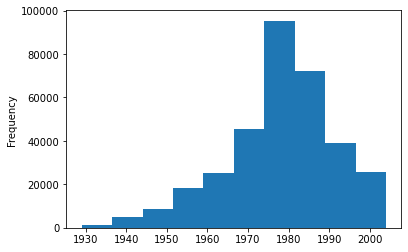

In [169]:
main_df['birth'].plot(kind='hist')

In [170]:
main_df['birth'].skew()
print(f"the skewnes is {main_df['birth'].skew()}") # la distribution est bien étalée vers la gauche
print(f"the kurtosis is {main_df['birth'].kurt()}") # la distribution est plus aplatie que la distribution normale correspondante



the skewnes is -0.5805926138924147
the kurtosis is 0.45291295951174515


In [171]:
# la moitié de l'échantillon est relativement jeune (né après 1980)
# l'autre moitié est  relativement agée (né après 1980)
main_df['birth'].median() 

1980.0

In [172]:
#  determinons la date  de  naissance des  personnes  les plus impliquées dans les transactions
main_df['birth'].mode()

0    1980
dtype: int64

In [173]:
main_df['birth'].mean()

1977.8233961569522

In [174]:

main_df['birth'].std(ddof=0) #  la  pluspart des clients sont nés entre 1963  et 1991

13.523902669131097

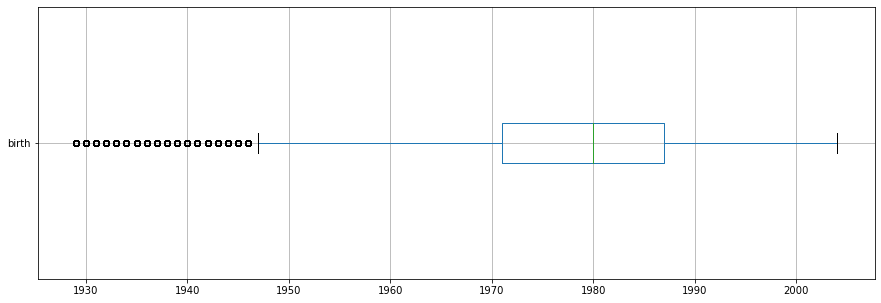

<Figure size 1080x720 with 0 Axes>

In [175]:
main_df.boxplot(column='birth',figsize=(15,5), vert=False, ) # il eiste des outliers
plt.figure(figsize = (15, 10))
plt.show()

In [176]:
main_df.head()

,id_prod,date,session_id,client_id,price,categ,first_merge,sex,birth,_merge
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,both,f,1977,both
1,0_1085,2021-09-29 11:14:59.793823,s_97382,c_4450,3.99,0.0,both,f,1977,both
2,0_1453,2021-08-27 19:50:46.796939,s_81509,c_4450,7.99,0.0,both,f,1977,both
3,0_1405,2021-08-27 20:07:25.878440,s_81509,c_4450,4.99,0.0,both,f,1977,both
4,0_1392,2021-12-28 11:45:04.072281,s_141302,c_4450,6.30,0.0,both,f,1977,both


In [177]:
main_df['date'].dt.isocalendar()['year'] # UInt32Dtype()



0         2021
1         2021
2         2021
3         2021
4         2021
          ... 
336813    2021
336814    2021
336815    2021
336816    2021
336817    2021
Name: year, Length: 336816, dtype: UInt32

In [178]:
main_df['date'].dt.year # dtype('float64')



0         2021
1         2021
2         2021
3         2021
4         2021
          ... 
336813    2021
336814    2021
336815    2021
336816    2021
336817    2021
Name: date, Length: 336816, dtype: int64

In [179]:
main_df.info() # age: int64 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336816 entries, 0 to 336817
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   id_prod      336816 non-null  object        
 1   date         336816 non-null  datetime64[ns]
 2   session_id   336816 non-null  object        
 3   client_id    336816 non-null  object        
 4   price        336816 non-null  float64       
 5   categ        336816 non-null  float64       
 6   first_merge  336816 non-null  category      
 7   sex          336816 non-null  object        
 8   birth        336816 non-null  int64         
 9   _merge       336816 non-null  category      
dtypes: category(2), datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 23.8+ MB


In [180]:
main_df['age'] = main_df['date'].dt.year  - main_df['birth']
main_df


/var/folders/b5/6wc9kpm138l0bt8lxhymh7l00000gn/T/ipykernel_17553/304680536.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['age'] = main_df['date'].dt.year  - main_df['birth']


,id_prod,date,session_id,client_id,price,categ,first_merge,sex,birth,_merge,age
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,both,f,1977,both,44
1,0_1085,2021-09-29 11:14:59.793823,s_97382,c_4450,3.99,0.0,both,f,1977,both,44
2,0_1453,2021-08-27 19:50:46.796939,s_81509,c_4450,7.99,0.0,both,f,1977,both,44
3,0_1405,2021-08-27 20:07:25.878440,s_81509,c_4450,4.99,0.0,both,f,1977,both,44
4,0_1392,2021-12-28 11:45:04.072281,s_141302,c_4450,6.30,0.0,both,f,1977,both,44
...,...,...,...,...,...,...,...,...,...,...,...
336813,1_607,2021-09-25 07:26:00.224331,s_95185,c_4786,26.99,1.0,both,f,1967,both,54
336814,1_673,2021-06-01 00:49:49.781631,s_42350,c_2793,12.99,1.0,both,m,1933,both,88
336815,0_2075,2021-10-09 09:03:48.268536,s_102200,c_2793,8.99,0.0,both,m,1933,both,88
336816,0_1692,2021-09-15 19:42:08.596375,s_90430,c_4478,13.36,0.0,both,f,1970,both,51


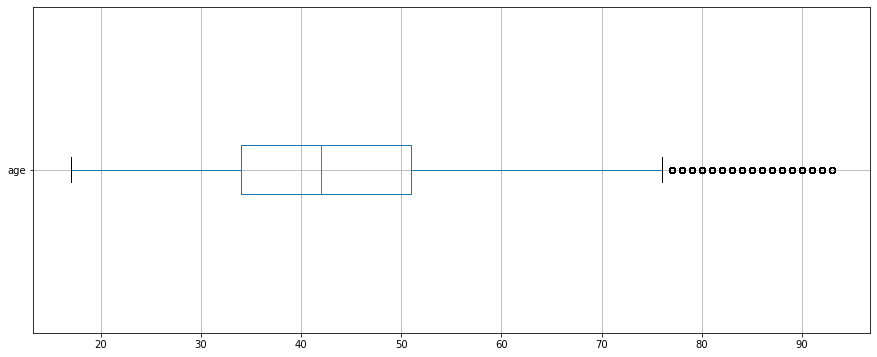

In [181]:
# même representation mais avec les ages à la place des dates de naissances cette fois-ci a

main_df.boxplot('age', vert=False, figsize=(15, 6))
plt.savefig('boxplot_age.png')
plt.show()


In [182]:
q_1 = main_df['age'].quantile(0.25)
q_3 = main_df['age'].quantile(0.75)
sup_age = q_3 + 1.5 * (q_3 - q_1)
inf_age = q_1 - 1.5 * (q_3 - q_1) # to do print

print(f"q_1 = {q_1}ans\nq_3 = {q_3}ans")
print(sup_age,'ans est la borne superieure de la moustache.')
print(inf_age,'ans est la borne inférieure.')


main_df[main_df['age'] > sup_age]  # df des ages anormalement élevées, atypique. 8712  clients ont plus de 75 ans


q_1 = 34.0ans
q_3 = 51.0ans
76.5 ans est la borne superieure de la moustache.
8.5 ans est la borne inférieure.


,id_prod,date,session_id,client_id,price,categ,first_merge,sex,birth,_merge,age
19312,0_1483,2021-05-22 20:12:24.840410,s_38109,c_2377,4.99,0.0,both,f,1937,both,84
19313,0_1442,2021-08-14 12:30:21.373257,s_75618,c_2377,4.89,0.0,both,f,1937,both,84
19314,1_431,2021-07-04 12:26:36.468386,s_57752,c_2377,27.99,1.0,both,f,1937,both,84
19315,0_2044,2021-04-22 16:29:01.314866,s_24214,c_2377,5.28,0.0,both,f,1937,both,84
19316,0_1529,2021-04-24 22:14:47.548773,s_25279,c_2377,3.99,0.0,both,f,1937,both,84
...,...,...,...,...,...,...,...,...,...,...,...
336798,0_1362,2021-06-11 01:55:37.953836,s_46969,c_467,11.30,0.0,both,m,1937,both,84
336799,0_2123,2021-06-11 01:54:00.742485,s_46969,c_467,9.99,0.0,both,m,1937,both,84
336800,1_735,2021-06-19 00:53:32.989096,s_50585,c_467,22.99,1.0,both,m,1937,both,84
336814,1_673,2021-06-01 00:49:49.781631,s_42350,c_2793,12.99,1.0,both,m,1933,both,88


In [ ]:
main_df['age'].plot(kind='bar')


In [184]:
main_df[main_df['age'] > sup_age]['age'].max()

93

In [185]:
mean_age = main_df['age'].mean() # moyenne with outlier

mean_inf75 = main_df[main_df['age'] < sup_age]['age'].mean() # moyenne withouth outlier

std_price = main_df['age'].std(ddof=0)


print(f"l\'age moyen en tenant compte des outliers est:{mean_age:.2f}")
print(f"l\'age moyen en ignorant les  outliers est:{mean_inf75:.2f}")
print(f"l\'écart type est de:{std_price:.2f}")

# l'impact des outliers est limité dans cet échantillon

l'age moyen en tenant compte des outliers est:43.35
l'age moyen en ignorant les  outliers est:42.52
l'écart type est de:13.53


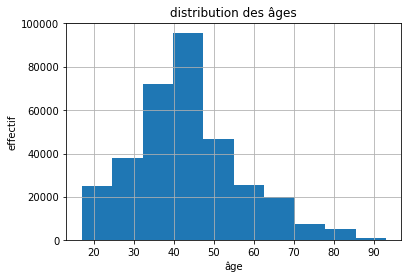

In [186]:
main_df['age'].hist()
plt.title('distribution des âges')
plt.xlabel('âge')
plt.ylabel('effectif')
plt.savefig('distribution des âges')

<AxesSubplot:>

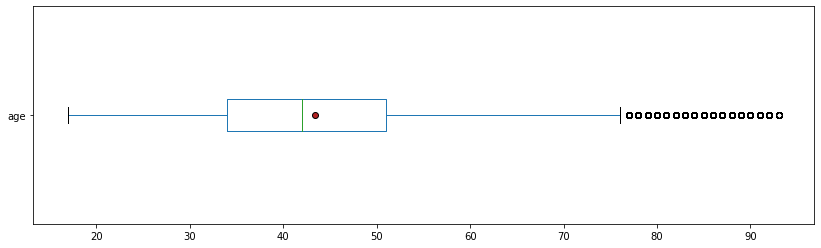

In [187]:
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
main_df['age'].plot(kind = 'box', vert=False, figsize=(14, 4), showmeans=True, meanprops=meanprops) 


In [188]:
main_df['age'].mean()

43.3514262980381

In [189]:
main_df['age'].median()

42.0

# timeseries

In [190]:
main_df.head()

,id_prod,date,session_id,client_id,price,categ,first_merge,sex,birth,_merge,age
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,both,f,1977,both,44
1,0_1085,2021-09-29 11:14:59.793823,s_97382,c_4450,3.99,0.0,both,f,1977,both,44
2,0_1453,2021-08-27 19:50:46.796939,s_81509,c_4450,7.99,0.0,both,f,1977,both,44
3,0_1405,2021-08-27 20:07:25.878440,s_81509,c_4450,4.99,0.0,both,f,1977,both,44
4,0_1392,2021-12-28 11:45:04.072281,s_141302,c_4450,6.30,0.0,both,f,1977,both,44


In [191]:
main_df['date'].isnull().sum() # supprimer du main_df

0

In [192]:
main_df[main_df['date'].isnull()]

,id_prod,date,session_id,client_id,price,categ,first_merge,sex,birth,_merge,age


In [193]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336816 entries, 0 to 336817
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   id_prod      336816 non-null  object        
 1   date         336816 non-null  datetime64[ns]
 2   session_id   336816 non-null  object        
 3   client_id    336816 non-null  object        
 4   price        336816 non-null  float64       
 5   categ        336816 non-null  float64       
 6   first_merge  336816 non-null  category      
 7   sex          336816 non-null  object        
 8   birth        336816 non-null  int64         
 9   _merge       336816 non-null  category      
 10  age          336816 non-null  int64         
dtypes: category(2), datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 26.3+ MB


In [194]:
main_df.isnull().sum()

id_prod        0
date           0
session_id     0
client_id      0
price          0
categ          0
first_merge    0
sex            0
birth          0
_merge         0
age            0
dtype: int64

In [195]:
main_df_time = main_df.set_index('date')
main_df_time

,id_prod,session_id,client_id,price,categ,first_merge,sex,birth,_merge,age
date,,,,,,,,,,
2021-04-10 18:37:28.723910,0_1483,s_18746,c_4450,4.99,0.0,both,f,1977,both,44
2021-09-29 11:14:59.793823,0_1085,s_97382,c_4450,3.99,0.0,both,f,1977,both,44
2021-08-27 19:50:46.796939,0_1453,s_81509,c_4450,7.99,0.0,both,f,1977,both,44
2021-08-27 20:07:25.878440,0_1405,s_81509,c_4450,4.99,0.0,both,f,1977,both,44
2021-12-28 11:45:04.072281,0_1392,s_141302,c_4450,6.30,0.0,both,f,1977,both,44
...,...,...,...,...,...,...,...,...,...,...
2021-09-25 07:26:00.224331,1_607,s_95185,c_4786,26.99,1.0,both,f,1967,both,54
2021-06-01 00:49:49.781631,1_673,s_42350,c_2793,12.99,1.0,both,m,1933,both,88
2021-10-09 09:03:48.268536,0_2075,s_102200,c_2793,8.99,0.0,both,m,1933,both,88


In [196]:
main_df_time.isnull().sum()

id_prod        0
session_id     0
client_id      0
price          0
categ          0
first_merge    0
sex            0
birth          0
_merge         0
age            0
dtype: int64

<AxesSubplot:xlabel='date'>

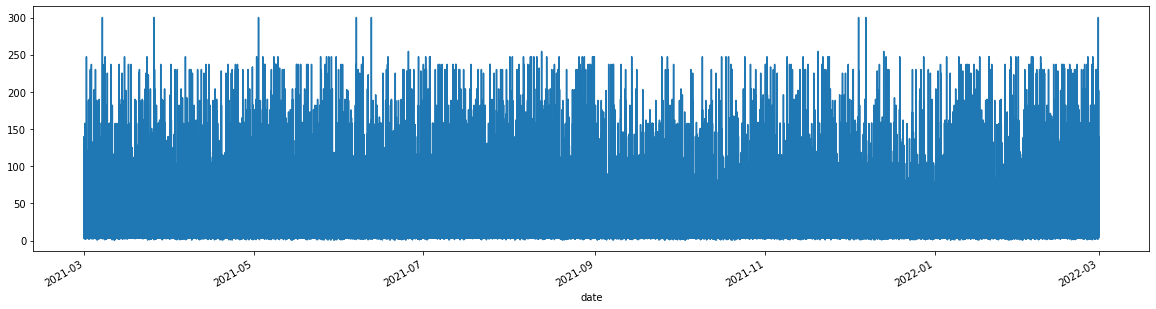

In [197]:
#  le prix n'évolue pas particulièrement avec le temps
main_df_time['price'].plot(figsize=(20,5)) 


### Analyse du chiffre d'affaire

In [198]:
main_df_time.head()

,id_prod,session_id,client_id,price,categ,first_merge,sex,birth,_merge,age
date,,,,,,,,,,
2021-04-10 18:37:28.723910,0_1483,s_18746,c_4450,4.99,0.0,both,f,1977,both,44
2021-09-29 11:14:59.793823,0_1085,s_97382,c_4450,3.99,0.0,both,f,1977,both,44
2021-08-27 19:50:46.796939,0_1453,s_81509,c_4450,7.99,0.0,both,f,1977,both,44
2021-08-27 20:07:25.878440,0_1405,s_81509,c_4450,4.99,0.0,both,f,1977,both,44
2021-12-28 11:45:04.072281,0_1392,s_141302,c_4450,6.30,0.0,both,f,1977,both,44


In [199]:
# CA par clients
ca_par_clients = main_df_time.groupby('client_id')['price'].sum()
ca_par_clients

client_id
c_1        300.65
c_10       586.18
c_100      222.87
c_1000     980.02
c_1001    1102.45
           ...   
c_995      119.08
c_996      739.60
c_997      572.89
c_998     1527.69
c_999      305.00
Name: price, Length: 8600, dtype: float64

In [200]:
# CA par produits
ca_par_produits = main_df_time.groupby('id_prod')['price'].sum()
ca_par_produits

id_prod
0_0        2291.25
0_1        2736.51
0_10        215.40
0_100        41.20
0_1000     1518.48
            ...   
2_95        296.97
2_96      13462.71
2_97        804.95
2_98        149.74
2_99        169.98
Name: price, Length: 3265, dtype: float64

In [201]:
# prix moyen mensuel 
main_df_time['price'].resample('M').mean()

# le panier moyen(prix des livres achetés) est le plus bas en octobre 

date
2021-03-31    16.781186
2021-04-30    16.650544
2021-05-31    17.328749
2021-06-30    17.947357
2021-07-31    19.458648
2021-08-31    18.712599
2021-09-30    15.117391
2021-10-31    14.790224
2021-11-30    18.141718
2021-12-31    16.130333
2022-01-31    17.840323
2022-02-28    18.021930
Freq: M, Name: price, dtype: float64

In [326]:
main_df_time.head()

,id_prod,session_id,client_id,price,categ,first_merge,sex,birth,_merge,age
date,,,,,,,,,,
2021-04-10 18:37:28.723910,0_1483,s_18746,c_4450,4.99,0.0,both,f,1977,both,44
2021-09-29 11:14:59.793823,0_1085,s_97382,c_4450,3.99,0.0,both,f,1977,both,44
2021-08-27 19:50:46.796939,0_1453,s_81509,c_4450,7.99,0.0,both,f,1977,both,44
2021-08-27 20:07:25.878440,0_1405,s_81509,c_4450,4.99,0.0,both,f,1977,both,44
2021-12-28 11:45:04.072281,0_1392,s_141302,c_4450,6.30,0.0,both,f,1977,both,44


In [329]:
main_df_time['price'].resample('M').mean().plot()

date
2021-03-31    16.781186
2021-04-30    16.650544
2021-05-31    17.328749
2021-06-30    17.947357
2021-07-31    19.458648
2021-08-31    18.712599
2021-09-30    15.117391
2021-10-31    14.790224
2021-11-30    18.141718
2021-12-31    16.130333
2022-01-31    17.840323
2022-02-28    18.021930
Freq: M, Name: price, dtype: float64

<AxesSubplot:xlabel='date'>

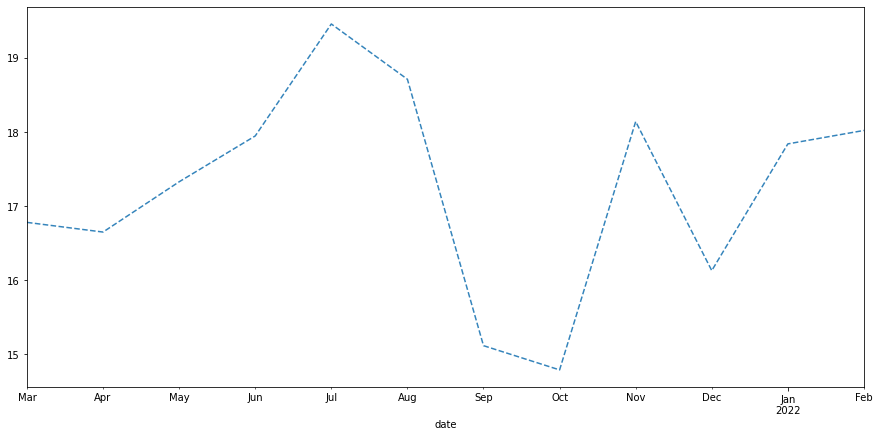

In [338]:
main_df_time['price'].resample('M').mean().plot(figsize=(15, 7), ls='--', alpha=0.9)


In [348]:
main_df_time['2021-04-10'].head()

/var/folders/b5/6wc9kpm138l0bt8lxhymh7l00000gn/T/ipykernel_17553/2298606035.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  main_df_time['2021-04-10'].head()


AssertionError: <class 'numpy.ndarray'>

In [354]:
main_df_time.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 336816 entries, 2021-04-10 18:37:28.723910 to 2021-09-25 18:07:25.880052
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   id_prod      336816 non-null  object  
 1   session_id   336816 non-null  object  
 2   client_id    336816 non-null  object  
 3   price        336816 non-null  float64 
 4   categ        336816 non-null  float64 
 5   first_merge  336816 non-null  category
 6   sex          336816 non-null  object  
 7   birth        336816 non-null  int64   
 8   _merge       336816 non-null  category
 9   age          336816 non-null  int64   
dtypes: category(2), float64(2), int64(2), object(4)
memory usage: 31.8+ MB


In [357]:
test  = main_df_time.sort_index()
test.head()

,id_prod,session_id,client_id,price,categ,first_merge,sex,birth,_merge,age
date,,,,,,,,,,
2021-03-01 00:01:07.843138,0_1259,s_1,c_329,11.99,0.0,both,f,1967,both,54
2021-03-01 00:02:26.047414,0_1390,s_2,c_664,19.37,0.0,both,m,1960,both,61
2021-03-01 00:02:38.311413,0_1352,s_3,c_580,4.50,0.0,both,m,1988,both,33
2021-03-01 00:04:54.559692,0_1458,s_4,c_7912,6.55,0.0,both,f,1989,both,32
2021-03-01 00:05:18.801198,0_1358,s_5,c_2033,16.49,0.0,both,f,1956,both,65


In [358]:
test['2021']

/var/folders/b5/6wc9kpm138l0bt8lxhymh7l00000gn/T/ipykernel_17553/2474389987.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  test['2021']


,id_prod,session_id,client_id,price,categ,first_merge,sex,birth,_merge,age
date,,,,,,,,,,
2021-03-01 00:01:07.843138,0_1259,s_1,c_329,11.99,0.0,both,f,1967,both,54
2021-03-01 00:02:26.047414,0_1390,s_2,c_664,19.37,0.0,both,m,1960,both,61
2021-03-01 00:02:38.311413,0_1352,s_3,c_580,4.50,0.0,both,m,1988,both,33
2021-03-01 00:04:54.559692,0_1458,s_4,c_7912,6.55,0.0,both,f,1989,both,32
2021-03-01 00:05:18.801198,0_1358,s_5,c_2033,16.49,0.0,both,f,1956,both,65
...,...,...,...,...,...,...,...,...,...,...
2021-12-31 23:44:55.226092,0_1501,s_143108,c_2601,11.99,0.0,both,m,1997,both,24
2021-12-31 23:45:55.526569,1_451,s_143098,c_5037,20.99,1.0,both,f,1974,both,47
2021-12-31 23:49:20.478294,0_1378,s_143108,c_2601,13.96,0.0,both,m,1997,both,24


In [362]:
test.loc['2021-09':'2021-10']

,id_prod,session_id,client_id,price,categ,first_merge,sex,birth,_merge,age
date,,,,,,,,,,
2021-09-01 00:02:22.251475,1_398,s_83324,c_7102,10.17,1.0,both,m,1983,both,38
2021-09-01 00:05:02.698139,0_1325,s_83314,c_1650,9.99,0.0,both,m,1974,both,47
2021-09-01 00:08:01.189868,1_475,s_83325,c_5895,20.99,1.0,both,m,1971,both,50
2021-09-01 00:08:40.857947,0_387,s_83302,c_3626,16.99,0.0,both,f,1962,both,59
2021-09-01 00:10:18.312029,0_1893,s_83326,c_5088,18.99,0.0,both,f,1970,both,51
...,...,...,...,...,...,...,...,...,...,...
2021-10-31 23:42:55.889671,0_1108,s_112940,c_6259,17.45,0.0,both,m,1991,both,30
2021-10-31 23:48:14.590919,1_414,s_112948,c_1609,23.83,1.0,both,m,1980,both,41
2021-10-31 23:51:26.167675,0_1425,s_112949,c_1767,12.99,0.0,both,f,1983,both,38


In [364]:
test.loc['2021-09':'2021-10']['price'].resample('w').mean()

date
2021-09-05    16.013781
2021-09-12    15.842447
2021-09-19    15.021154
2021-09-26    14.533875
2021-10-03    14.371456
2021-10-10    13.890824
2021-10-17    14.213889
2021-10-24    14.642843
2021-10-31    16.303660
Freq: W-SUN, Name: price, dtype: float64

<AxesSubplot:xlabel='date'>

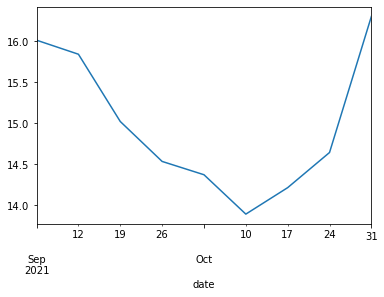

In [365]:
test.loc['2021-09':'2021-10']['price'].resample('w').mean().plot()

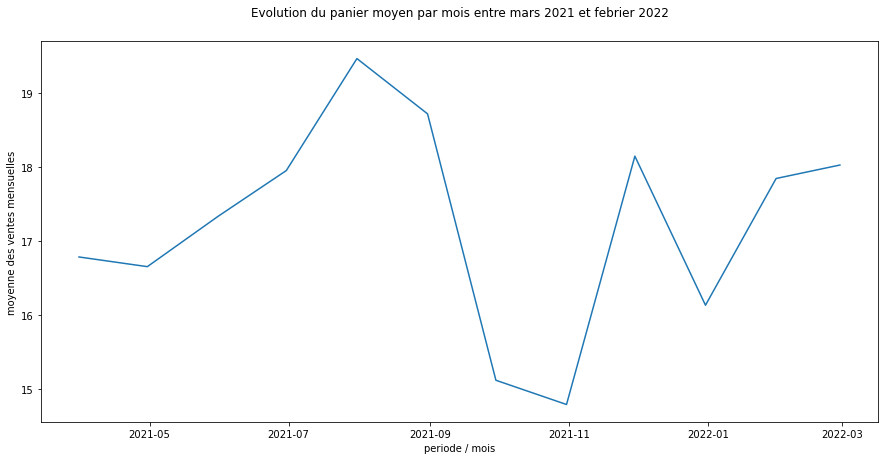

<Figure size 432x288 with 0 Axes>

In [202]:
# Evolution du panier moyen(prix) mensuel
plt.figure(figsize=(15, 7))
plt.plot(main_df_time['price'].resample('M').mean().index, main_df_time['price'].resample('M').mean().values)
plt.title('Evolution du panier moyen par mois entre mars 2021 et febrier 2022', y=1.05)
plt.xlabel('periode / mois')
plt.ylabel('moyenne des ventes mensuelles')
plt.show()
plt.savefig('evolution_prix_moyen_mensuel.png')

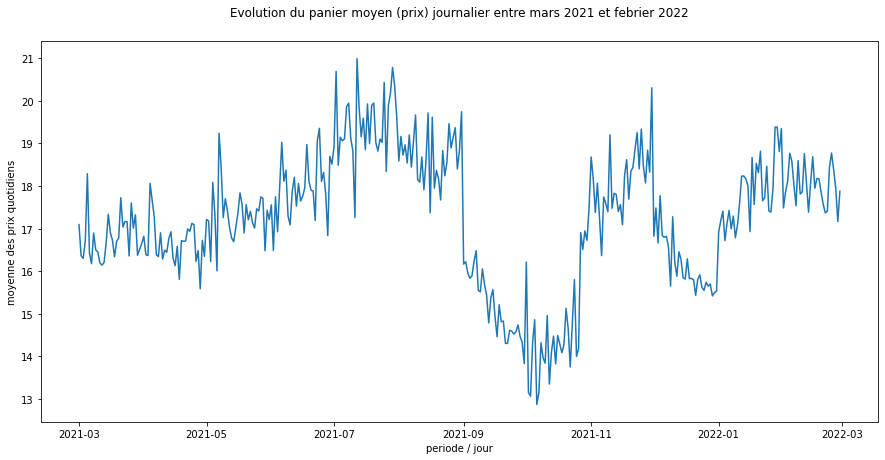

<Figure size 432x288 with 0 Axes>

In [203]:
# Evolution du panier moyen (prix) journalier
plt.figure(figsize=(15, 7))
plt.plot(main_df_time['price'].resample('D').mean().index, main_df_time['price'].resample('D').mean().values)
plt.title('Evolution du panier moyen (prix) journalier entre mars 2021 et febrier 2022', y=1.05)
plt.xlabel('periode / jour')
plt.ylabel('moyenne des prix quotidiens')
plt.show()
plt.savefig('evolution_prix_moyen_journalier')

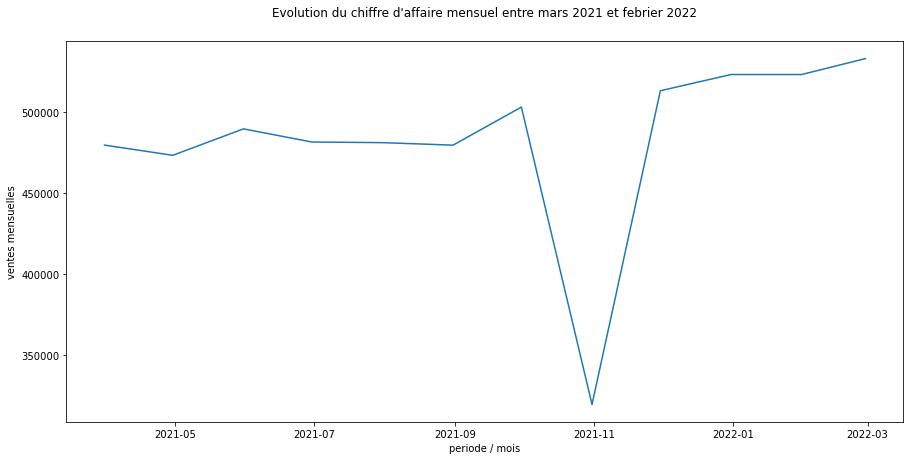

<Figure size 432x288 with 0 Axes>

In [204]:
# Evolution du CA mensuel
plt.figure(figsize=(15, 7))
plt.plot(main_df_time['price'].resample('M').sum().index, main_df_time['price'].resample('M').sum().values)
plt.title('Evolution du chiffre d\'affaire mensuel entre mars 2021 et febrier 2022', y=1.05)
plt.xlabel('periode / mois')
plt.ylabel('ventes mensuelles')
plt.show()
plt.savefig('evolution_chiffre_affaire_mensuel.png')

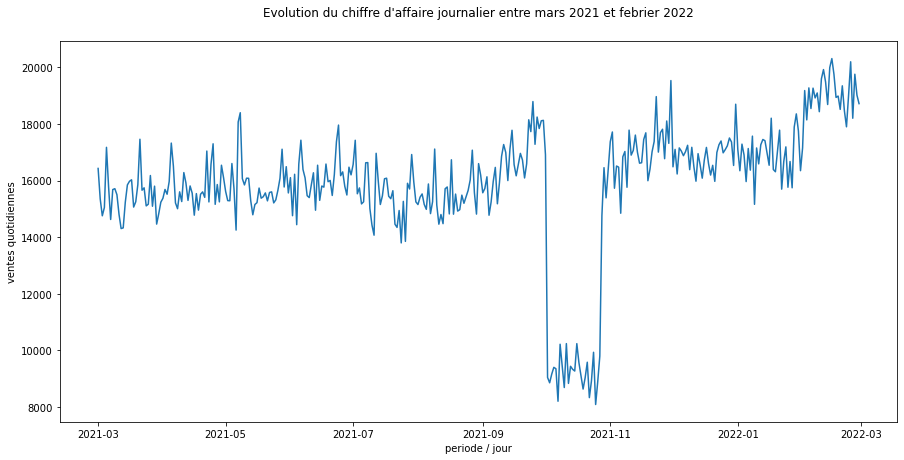

<Figure size 432x288 with 0 Axes>

In [205]:
# Evolution du CA journalier
plt.figure(figsize=(15, 7))
plt.plot(main_df_time['price'].resample('D').sum().index, main_df_time['price'].resample('D').sum().values)
plt.title('Evolution du chiffre d\'affaire journalier entre mars 2021 et febrier 2022', y=1.05)
plt.xlabel('periode / jour')
plt.ylabel('ventes quotidiennes')
plt.show()
plt.savefig('evolution_chiffre_affaire_journalier')

##### Analyse du CA en octobre 2021

<AxesSubplot:xlabel='date'>

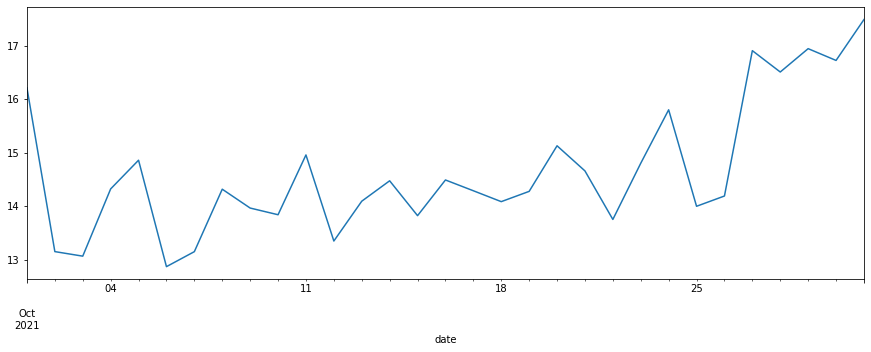

In [206]:
main_df_time.loc['2021-10','price'].resample('D').mean().plot(figsize=(15,5))

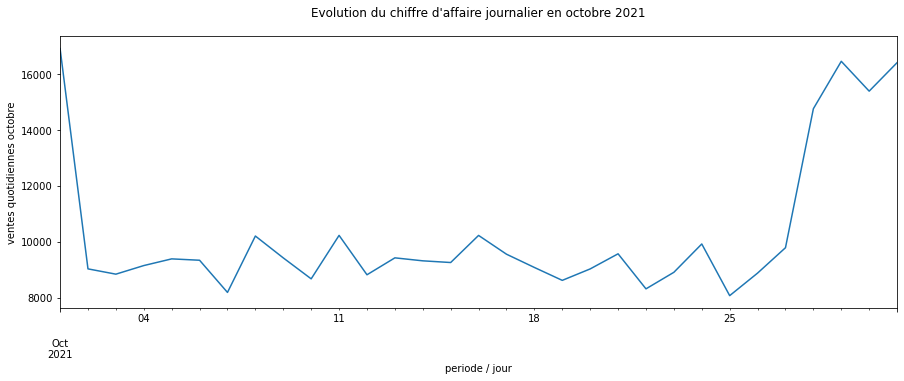

<Figure size 432x288 with 0 Axes>

In [207]:
# exemple de l'evolution du CA en Octobre uniquement
plt.figure(figsize=(15, 7))
main_df_time.loc['2021-10','price'].resample('D').sum().plot(figsize=(15,5))
plt.title('Evolution du chiffre d\'affaire journalier en octobre 2021', y=1.05)
plt.xlabel('periode / jour')
plt.ylabel('ventes quotidiennes octobre')
plt.show()
plt.savefig('evolution_chiffre_affaire_Octobre')


In [208]:
main_df_time.head()

,id_prod,session_id,client_id,price,categ,first_merge,sex,birth,_merge,age
date,,,,,,,,,,
2021-04-10 18:37:28.723910,0_1483,s_18746,c_4450,4.99,0.0,both,f,1977,both,44
2021-09-29 11:14:59.793823,0_1085,s_97382,c_4450,3.99,0.0,both,f,1977,both,44
2021-08-27 19:50:46.796939,0_1453,s_81509,c_4450,7.99,0.0,both,f,1977,both,44
2021-08-27 20:07:25.878440,0_1405,s_81509,c_4450,4.99,0.0,both,f,1977,both,44
2021-12-28 11:45:04.072281,0_1392,s_141302,c_4450,6.30,0.0,both,f,1977,both,44


In [209]:
# au 1er oct.
main_df_time.loc['2021-10-01', :].head()

,id_prod,session_id,client_id,price,categ,first_merge,sex,birth,_merge,age
date,,,,,,,,,,
2021-10-01 02:04:45.573463,0_1368,s_98218,c_1609,5.13,0.0,both,m,1980,both,41
2021-10-01 21:12:54.733993,0_1152,s_98610,c_1609,10.70,0.0,both,m,1980,both,41
2021-10-01 01:02:59.307691,0_1596,s_98194,c_1609,10.36,0.0,both,m,1980,both,41
2021-10-01 21:23:00.773779,0_1585,s_98592,c_1609,4.99,0.0,both,m,1980,both,41
2021-10-01 01:09:06.242025,0_1616,s_98185,c_1609,13.50,0.0,both,m,1980,both,41


In [210]:
main_df_time.loc['2021-10-01', :]

,id_prod,session_id,client_id,price,categ,first_merge,sex,birth,_merge,age
date,,,,,,,,,,
2021-10-01 02:04:45.573463,0_1368,s_98218,c_1609,5.13,0.0,both,m,1980,both,41
2021-10-01 21:12:54.733993,0_1152,s_98610,c_1609,10.70,0.0,both,m,1980,both,41
2021-10-01 01:02:59.307691,0_1596,s_98194,c_1609,10.36,0.0,both,m,1980,both,41
2021-10-01 21:23:00.773779,0_1585,s_98592,c_1609,4.99,0.0,both,m,1980,both,41
2021-10-01 01:09:06.242025,0_1616,s_98185,c_1609,13.50,0.0,both,m,1980,both,41
...,...,...,...,...,...,...,...,...,...,...
2021-10-01 15:30:25.706753,2_202,s_98481,c_6305,67.57,2.0,both,f,2002,both,19
2021-10-01 06:44:56.630626,0_1325,s_98297,c_6226,9.99,0.0,both,f,1979,both,42
2021-10-01 06:30:01.451167,0_2266,s_98297,c_6226,7.70,0.0,both,f,1979,both,42


In [211]:
main_df_time.loc['2021-10-01', :]['price'].sum()

16909.36

In [212]:
main_df_time.loc['2021-10-02', :]['price'].sum()

9033.15

In [213]:
main_df_time.loc['2021-10-02', :].head()

,id_prod,session_id,client_id,price,categ,first_merge,sex,birth,_merge,age
date,,,,,,,,,,
2021-10-02 14:31:28.766422,0_1420,s_98959,c_1609,11.53,0.0,both,m,1980,both,41
2021-10-02 20:29:01.908545,0_1405,s_99064,c_1609,4.99,0.0,both,m,1980,both,41
2021-10-02 09:08:34.425525,0_1100,s_98853,c_1609,3.03,0.0,both,m,1980,both,41
2021-10-02 11:42:14.713981,0_1584,s_98901,c_1609,11.85,0.0,both,m,1980,both,41
2021-10-02 12:34:27.525186,0_1512,s_98921,c_1609,5.29,0.0,both,m,1980,both,41


In [214]:
# j'observe les valeurs du mois d'octobre 
main_df_time.loc['2021-10','price']

date
2021-10-19 08:41:13.576343    12.53
2021-10-19 08:18:54.853222     3.99
2021-10-27 01:33:01.630134     4.99
2021-10-14 21:12:05.009184    12.71
2021-10-30 09:46:51.183163     8.58
                              ...  
2021-10-19 10:29:44.844616     4.99
2021-10-27 16:05:07.632601     8.99
2021-10-31 09:25:15.386659    24.67
2021-10-26 11:46:21.315246     6.31
2021-10-09 09:03:48.268536     8.99
Name: price, Length: 21584, dtype: float64

In [215]:
main_df[main_df['date'].isna()]

,id_prod,date,session_id,client_id,price,categ,first_merge,sex,birth,_merge,age


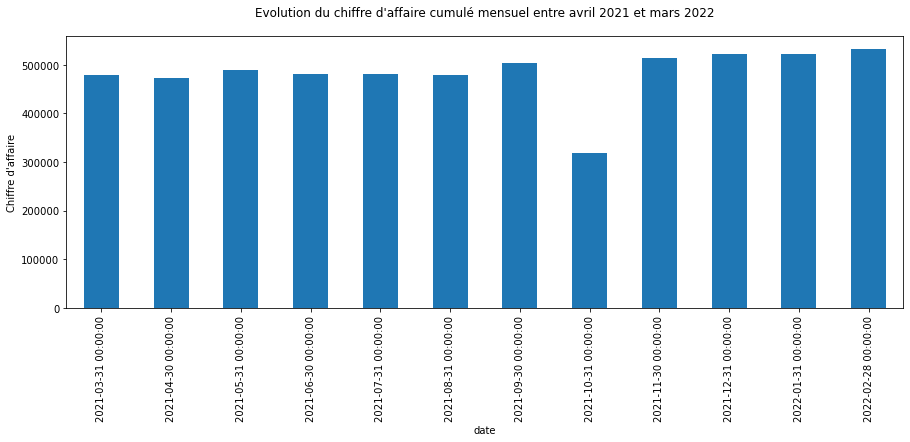

<Figure size 432x288 with 0 Axes>

In [216]:
plt.figure(figsize=(15,5))
plt.title('Evolution du chiffre d\'affaire cumulé mensuel entre avril 2021 et mars 2022', y =1.05)
main_df_time['price'].resample('M').sum().plot(kind='bar')
plt.xlabel('date')
plt.ylabel('Chiffre d\'affaire')
plt.show()
plt.savefig('ventes_mensuel_bar_seul.png')


<function matplotlib.pyplot.show(close=None, block=None)>

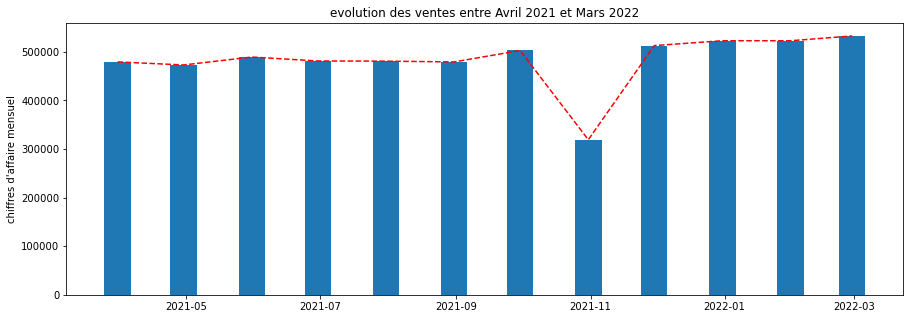

In [217]:
fig,ax = plt.subplots(figsize=(15, 5))
ax.bar(main_df_time['price'].resample('M').sum().index, main_df_time['price'].resample('M').sum().values, width = 12)
ax.plot(main_df_time['price'].resample('M').sum().index, main_df_time['price'].resample('M').sum().values, c = 'red',linestyle = '--')
ax.set_title('evolution des ventes entre Avril 2021 et Mars 2022')
ax.set_ylabel('chiffres d\'affaire mensuel')
plt.savefig('ventes_avril_mars-2022.png')
plt.show


In [218]:
main_df[main_df['categ'].isnull()]

,id_prod,date,session_id,client_id,price,categ,first_merge,sex,birth,_merge,age


In [219]:
main_df_copy = main_df.copy(deep=True)
main_df_copy.isnull().sum()

id_prod        0
date           0
session_id     0
client_id      0
price          0
categ          0
first_merge    0
sex            0
birth          0
_merge         0
age            0
dtype: int64

In [220]:
main_df.pivot(index='date', columns='categ', values='categ').head()


categ,0.0,1.0,2.0
date,,,
2021-03-01 00:01:07.843138,0.0,NaN,NaN
2021-03-01 00:02:26.047414,0.0,NaN,NaN
2021-03-01 00:02:38.311413,0.0,NaN,NaN
2021-03-01 00:04:54.559692,0.0,NaN,NaN
2021-03-01 00:05:18.801198,0.0,NaN,NaN


In [221]:
df_categ_date = main_df.pivot(index='date', columns='categ', values='categ').resample('M').count()
df_categ_date

categ,0.0,1.0,2.0
date,,,
2021-03-31,18119,9134,1315
2021-04-30,19335,7579,1501
2021-05-31,18485,8107,1653
2021-06-30,15886,9264,1669
2021-07-31,13569,9169,1978
2021-08-31,15717,7954,1948
2021-09-30,23124,9268,874
2021-10-31,18758,1666,1160
2021-11-30,14588,12316,1373


In [222]:
df_categ_date.index

DatetimeIndex(['2021-03-31', '2021-04-30', '2021-05-31', '2021-06-30',
               '2021-07-31', '2021-08-31', '2021-09-30', '2021-10-31',
               '2021-11-30', '2021-12-31', '2022-01-31', '2022-02-28'],
              dtype='datetime64[ns]', name='date', freq='M')

In [223]:
df_categ_date.values

array([[18119,  9134,  1315],
       [19335,  7579,  1501],
       [18485,  8107,  1653],
       [15886,  9264,  1669],
       [13569,  9169,  1978],
       [15717,  7954,  1948],
       [23124,  9268,   874],
       [18758,  1666,  1160],
       [14588, 12316,  1373],
       [19289, 12259,   876],
       [15386, 12560,  1370],
       [17273, 10459,  1835]])

<Figure size 432x288 with 0 Axes>

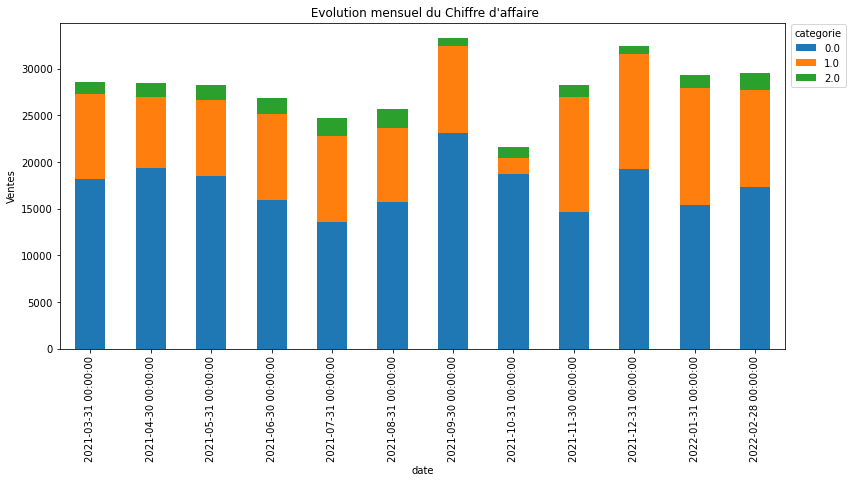

In [224]:
plt.figure()
df_categ_date.plot(kind='bar', stacked=True, figsize=(13, 6))
plt.ylabel('Ventes')
plt.title(' Evolution mensuel du Chiffre d\'affaire')
plt.legend(bbox_to_anchor=(1.09, 1.01), loc='upper right', title='categorie')
plt.savefig('evolution_ventes_mensuelles_categories.png')
plt.show()


- Analyse baisse du CA en octobre 

In [225]:
df_categ_date

categ,0.0,1.0,2.0
date,,,
2021-03-31,18119,9134,1315
2021-04-30,19335,7579,1501
2021-05-31,18485,8107,1653
2021-06-30,15886,9264,1669
2021-07-31,13569,9169,1978
2021-08-31,15717,7954,1948
2021-09-30,23124,9268,874
2021-10-31,18758,1666,1160
2021-11-30,14588,12316,1373


- <a> La baisse brutale du chiffre d'affaires en Octobre 2021 coincide avec la chute brutale des ventes de livres de la categorie 1 </a>

### Analyse de la variable prix

In [226]:
main_df['price'].dtypes

dtype('float64')

In [227]:
main_df['price'].isnull().sum()

0

In [228]:
main_df['price'].nunique()


1442

<AxesSubplot:title={'center':'distribution des prix'}>

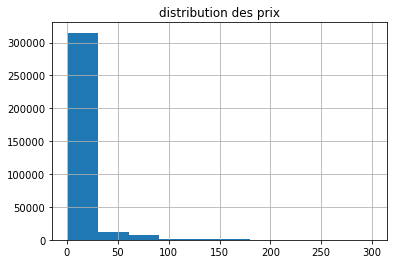

In [229]:
plt.title('distribution des prix')
main_df['price'].hist() # fonction puissance (idem que celle générée par les clients en nombre de transactions)

In [230]:
main_df['price'].mean()

17.21307993095078

In [231]:
main_df['price'].median()

13.9

In [232]:
main_df['price'].mode()

0    15.99
dtype: float64

In [233]:
main_df['price'].min() # des prix de livres négatif ? # supp les deuxx lignes tests pour avoir un minimum viable

0.62

In [234]:
main_df['price'].max()

300.0

<AxesSubplot:title={'center':'distribution des prix des produits'}>

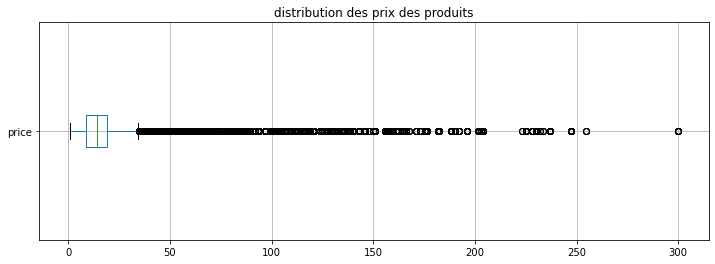

In [235]:
plt.figure(figsize=(12,4))
plt.title('distribution des prix des produits')
main_df.boxplot(column  ='price', vert=False, figsize = (12, 5)) # les prix sont compris entre -1€ et 300€
# 50% des livres vendus ont un prix inferieur à 14€


In [236]:
main_df['price'].std()

17.853122086138768

In [237]:
main_df['price'].std(ddof=0) # écart type non corrigée correspondant à l'échantillon

17.853095583337034

In [238]:
# on se rappelle que :
# l'écart interquartile est : 16.00
# outlier (borne inférieure moustache) < -17.01
# outlier (borne superieure moustache) >  46.99

In [239]:
# observons la  distribution sans les valeurs atypiques
df_price47 = main_df[main_df['price'] < 47]
df_price47

,id_prod,date,session_id,client_id,price,categ,first_merge,sex,birth,_merge,age
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,both,f,1977,both,44
1,0_1085,2021-09-29 11:14:59.793823,s_97382,c_4450,3.99,0.0,both,f,1977,both,44
2,0_1453,2021-08-27 19:50:46.796939,s_81509,c_4450,7.99,0.0,both,f,1977,both,44
3,0_1405,2021-08-27 20:07:25.878440,s_81509,c_4450,4.99,0.0,both,f,1977,both,44
4,0_1392,2021-12-28 11:45:04.072281,s_141302,c_4450,6.30,0.0,both,f,1977,both,44
...,...,...,...,...,...,...,...,...,...,...,...
336813,1_607,2021-09-25 07:26:00.224331,s_95185,c_4786,26.99,1.0,both,f,1967,both,54
336814,1_673,2021-06-01 00:49:49.781631,s_42350,c_2793,12.99,1.0,both,m,1933,both,88
336815,0_2075,2021-10-09 09:03:48.268536,s_102200,c_2793,8.99,0.0,both,m,1933,both,88
336816,0_1692,2021-09-15 19:42:08.596375,s_90430,c_4478,13.36,0.0,both,f,1970,both,51


In [240]:
main_df[main_df['price'] >100]['categ'].unique() # les livres les plus chers (prix > 100) sont ceuxx de la categorie 2

array([2.])

<AxesSubplot:>

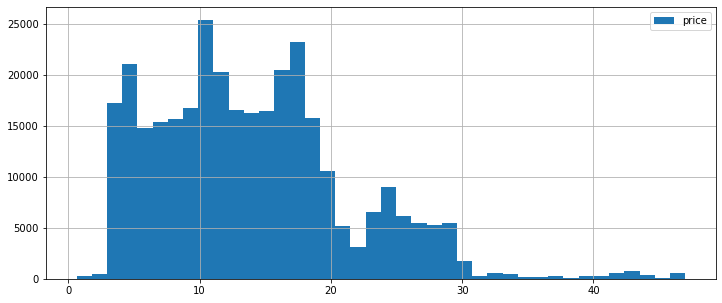

In [241]:
main_df.loc[main_df['price'] < 47, 'price'].hist(figsize=(12, 5), legend = 'histogramme des prix sans les outliers', bins =40)


In [242]:
df_price47['price'].skew() # distribution est étalée à droite

0.8829895537365207

In [243]:
df_price47['price'].kurt() # la distribution est plus applatie que la distibution normale, les observations sont plus concentrées


1.140759369304443

<AxesSubplot:>

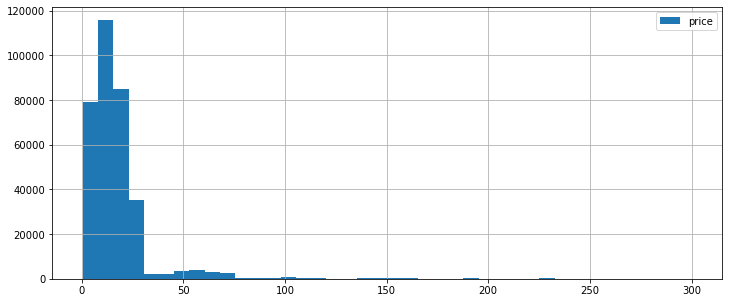

In [244]:
main_df['price'].hist(figsize=(12, 5), legend = 'histogramme des prix avec les outliers', bins =40) # vu plus haut (sans discretisation)


In [245]:
main_df['price'].skew() # ztalement vers la droite plus prononcé lorsqu'on tient compte des outliers

5.4799962125722645

In [246]:
main_df['price'].kurt() # histogramme encore moins applati lorsqu'on tient compte des outliers

45.43819574428631

### Analyse de concentration 
  

#### Courbe de Lorentz Clients / CA

In [247]:
main_df.head()

,id_prod,date,session_id,client_id,price,categ,first_merge,sex,birth,_merge,age
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,both,f,1977,both,44
1,0_1085,2021-09-29 11:14:59.793823,s_97382,c_4450,3.99,0.0,both,f,1977,both,44
2,0_1453,2021-08-27 19:50:46.796939,s_81509,c_4450,7.99,0.0,both,f,1977,both,44
3,0_1405,2021-08-27 20:07:25.878440,s_81509,c_4450,4.99,0.0,both,f,1977,both,44
4,0_1392,2021-12-28 11:45:04.072281,s_141302,c_4450,6.30,0.0,both,f,1977,both,44


In [248]:
main_df.shape # ne contient pas les valeurs nulles

(336816, 11)

In [249]:
ca_par_clients = main_df_time.groupby('client_id')['price'].sum()
ca_par_clients

client_id
c_1        300.65
c_10       586.18
c_100      222.87
c_1000     980.02
c_1001    1102.45
           ...   
c_995      119.08
c_996      739.60
c_997      572.89
c_998     1527.69
c_999      305.00
Name: price, Length: 8600, dtype: float64

In [250]:
ca_par_clients.values

array([ 300.65,  586.18,  222.87, ...,  572.89, 1527.69,  305.  ])

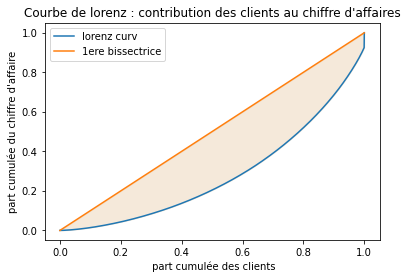

10% des clients sont à l'origine de 40% du CA
2O% des clients sont à l'origine d'environ 60% du CA


In [251]:
ventes_clients = ca_par_clients.values # chiffre d'affaire par client
np.sort(ventes_clients) # tri croissant des ventes

lorenz = np.cumsum(np.sort(ventes_clients)) / ventes_clients.sum()
np.append([0], lorenz)
xaxis = np.linspace(0,1,len(lorenz)) # définir les individus sur l'axe des abscisses
plt.plot(xaxis,lorenz, label = 'lorenz curv')
plt.plot([0,1], [0,1],label= '1ere bissectrice') #tracer la bissectrice
plt.xlabel(' part cumulée des clients')
plt.ylabel('part cumulée du chiffre d\'affaire')
plt.legend()
plt.title("Courbe de lorenz : contribution des clients au chiffre d'affaires")
plt.fill_between(xaxis, xaxis, lorenz, alpha = 0.3, color = 'burlywood')
plt.savefig('Courbe_de_Lorenz.png')
plt.show()


print(f"10% des clients sont à l'origine de 40% du CA\n2O% des clients sont à l'origine d'environ 60% du CA")

In [252]:
print(len(ca_par_clients))
print(len(ca_par_clients) * 10/100)
ca_par_clients.sort_values(ascending=False, inplace=True)
ca_par_clients

8600
860.0


client_id
c_1609    162007.34
c_4958    144257.21
c_6714     73217.98
c_3454     54463.56
c_7959      2564.25
            ...    
c_8351         6.31
c_890          6.08
c_1675         5.57
c_8114         4.99
c_8140         4.15
Name: price, Length: 8600, dtype: float64

#### Liste des tops 10% clients constituant 40 % du CA

In [253]:
print(list(ca_par_clients.index[0:860]))

['c_1609', 'c_4958', 'c_6714', 'c_3454', 'c_7959', 'c_8026', 'c_4491', 'c_2140', 'c_8392', 'c_7421', 'c_3263', 'c_3725', 'c_880', 'c_2595', 'c_7319', 'c_2077', 'c_7240', 'c_2284', 'c_760', 'c_1876', 'c_8510', 'c_2899', 'c_8556', 'c_5602', 'c_5922', 'c_7390', 'c_161', 'c_3030', 'c_682', 'c_6775', 'c_5953', 'c_794', 'c_778', 'c_1570', 'c_2220', 'c_1413', 'c_1636', 'c_6522', 'c_4023', 'c_3612', 'c_8600', 'c_1637', 'c_4840', 'c_963', 'c_2538', 'c_5104', 'c_5674', 'c_699', 'c_6969', 'c_5898', 'c_5449', 'c_4142', 'c_707', 'c_2212', 'c_1368', 'c_1074', 'c_632', 'c_7961', 'c_2505', 'c_8537', 'c_8327', 'c_4263', 'c_4120', 'c_1767', 'c_634', 'c_5935', 'c_8501', 'c_8163', 'c_1938', 'c_1893', 'c_3013', 'c_605', 'c_6646', 'c_4492', 'c_391', 'c_243', 'c_3699', 'c_4804', 'c_131', 'c_3991', 'c_383', 'c_5279', 'c_7683', 'c_283', 'c_7338', 'c_5921', 'c_6726', 'c_3347', 'c_3892', 'c_6573', 'c_1422', 'c_5993', 'c_1367', 'c_5062', 'c_1240', 'c_7150', 'c_2569', 'c_7388', 'c_1734', 'c_428', 'c_8574', 'c_4669

limit_output extension: Maximum message size of 5000 exceeded with 8487 characters

-  Indice de Gini clients / CA

In [254]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/ len(ventes_clients)
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
gini

0.4397164523487763

#### Courbe de Lorentz Produit / CA

In [255]:
ca_par_produits = main_df_time.groupby('id_prod')['price'].sum()
ca_par_produits

id_prod
0_0        2291.25
0_1        2736.51
0_10        215.40
0_100        41.20
0_1000     1518.48
            ...   
2_95        296.97
2_96      13462.71
2_97        804.95
2_98        149.74
2_99        169.98
Name: price, Length: 3265, dtype: float64

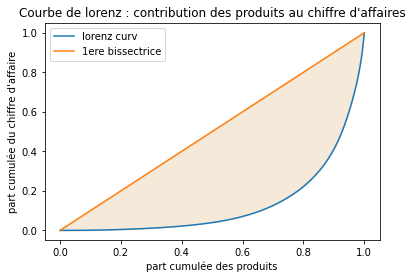

10% des produits sont à l'origine de 60% du CA
2O% des individus sont à l'origine d'environ 80% du CA
80% des produits ne contribuent en revanche qu'à 20% du CA


In [256]:
ventes_produits = ca_par_produits.values # chiffre d'affaire par produits
np.sort(ventes_produits) # tri croissant des ventes

lorenz = np.cumsum(np.sort(ventes_produits)) / ventes_clients.sum()
np.append([0], lorenz)
xaxis = np.linspace(0,1,len(lorenz)) # définir les individus sur l'axe des abscisses
plt.plot(xaxis,lorenz, label = 'lorenz curv')
plt.plot([0,1], [0,1],label= '1ere bissectrice') #tracer la bissectrice
plt.legend()
plt.xlabel('part cumulée des produits')
plt.ylabel('part cumulée du chiffre d\'affaire')
plt.title("Courbe de lorenz : contribution des produits au chiffre d'affaires")
plt.fill_between(xaxis, xaxis, lorenz, alpha = 0.3, color = 'burlywood')
plt.savefig('Courbe_de_Lorenz.png')
plt.show()


print(f"10% des produits sont à l'origine de 60% du CA\n2O% des individus sont à l'origine d'environ 80% du CA\n80% des produits ne contribuent en revanche qu'à 20% du CA")

In [257]:
print(len(ca_par_produits))
print(len(ca_par_produits) * 10/100)
ca_par_produits.sort_values(ascending=False, inplace=True)
ca_par_produits

3265
326.5


id_prod
2_135     33874.09
2_112     31960.61
2_102     28919.46
2_209     27296.10
2_110     27016.50
            ...   
0_1858        1.83
0_1284        1.38
0_1840        1.28
0_1539        0.99
0_1653        0.99
Name: price, Length: 3265, dtype: float64

#### Liste des tops 10% produits constituant 60 % du CA

In [258]:
print(list(ca_par_produits.index[0:327]))

['2_135', '2_112', '2_102', '2_209', '2_110', '1_369', '1_395', '2_166', '2_43', '2_39', '1_383', '1_414', '1_498', '2_202', '1_406', '1_431', '1_366', '1_385', '1_379', '1_417', '2_167', '2_208', '1_378', '1_389', '2_37', '1_456', '2_101', '2_108', '2_109', '2_207', '2_163', '1_432', '2_160', '2_32', '2_191', '1_396', '1_425', '1_413', '1_403', '1_437', '2_158', '1_397', '2_156', '1_392', '1_286', '1_457', '1_426', '1_412', '2_62', '1_376', '1_400', '1_475', '1_407', '1_279', '1_441', '1_388', '2_104', '2_46', '1_442', '2_181', '1_480', '2_155', '1_445', '1_446', '1_381', '2_96', '1_267', '1_468', '2_41', '1_277', '1_281', '1_265', '1_451', '1_262', '1_256', '2_147', '2_164', '2_184', '1_282', '2_162', '2_175', '2_113', '0_1421', '1_287', '1_351', '1_274', '2_172', '0_1441', '2_169', '2_161', '1_433', '1_343', '1_353', '2_144', '2_7', '0_1414', '2_159', '2_185', '1_483', '1_367', '2_211', '1_462', '1_459', '0_1451', '1_325', '2_230', '1_257', '2_150', '2_19', '0_1417', '2_79', '1_464'

-  Indice de Gini produit / CA

In [259]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/ len(ventes_produits)
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
gini

0.7384705100729146

# <a> Analyse bivariée </a>


### <a> - Analyse corrélation âge / prix des livres </a>

In [260]:
main_df.head()

,id_prod,date,session_id,client_id,price,categ,first_merge,sex,birth,_merge,age
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,both,f,1977,both,44
1,0_1085,2021-09-29 11:14:59.793823,s_97382,c_4450,3.99,0.0,both,f,1977,both,44
2,0_1453,2021-08-27 19:50:46.796939,s_81509,c_4450,7.99,0.0,both,f,1977,both,44
3,0_1405,2021-08-27 20:07:25.878440,s_81509,c_4450,4.99,0.0,both,f,1977,both,44
4,0_1392,2021-12-28 11:45:04.072281,s_141302,c_4450,6.30,0.0,both,f,1977,both,44


In [261]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336816 entries, 0 to 336817
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   id_prod      336816 non-null  object        
 1   date         336816 non-null  datetime64[ns]
 2   session_id   336816 non-null  object        
 3   client_id    336816 non-null  object        
 4   price        336816 non-null  float64       
 5   categ        336816 non-null  float64       
 6   first_merge  336816 non-null  category      
 7   sex          336816 non-null  object        
 8   birth        336816 non-null  int64         
 9   _merge       336816 non-null  category      
 10  age          336816 non-null  int64         
dtypes: category(2), datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 26.3+ MB


In [262]:
main_df.isnull().sum()

id_prod        0
date           0
session_id     0
client_id      0
price          0
categ          0
first_merge    0
sex            0
birth          0
_merge         0
age            0
dtype: int64

In [263]:
# on peut déjà observer qu'il n'y a à priori aucune corrélation...
# entre l'âge des clients et le montant des achats
main_df[['price', 'age']].corr()

,price,age
price,1.000000,-0.210857
age,-0.210857,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

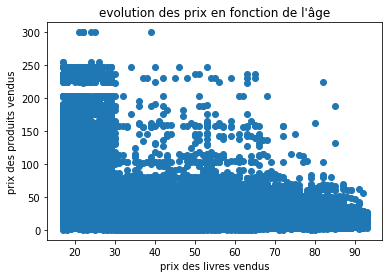

In [264]:
# Il n'y a à priori aucune corrélation entre le prix des livres et l'âge des clients
plt.scatter(main_df['age'], main_df['price'])
plt.xlabel('prix des livres vendus')
plt.ylabel('prix des produits vendus')
plt.title('evolution des prix en fonction de l\'âge')
plt.show

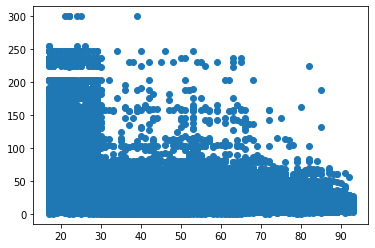

In [265]:
# une autre manière d'obtenir un nuage des points
plt.plot(main_df['age'], main_df['price'], 'o') 

In [266]:
import scipy.stats as st

In [267]:
main_df.isna().sum()

id_prod        0
date           0
session_id     0
client_id      0
price          0
categ          0
first_merge    0
sex            0
birth          0
_merge         0
age            0
dtype: int64

In [268]:
# A supp le nettoyage a été effectué en amont
main_df_no_NaN  = main_df.dropna()
main_df_no_NaN

,id_prod,date,session_id,client_id,price,categ,first_merge,sex,birth,_merge,age
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,both,f,1977,both,44
1,0_1085,2021-09-29 11:14:59.793823,s_97382,c_4450,3.99,0.0,both,f,1977,both,44
2,0_1453,2021-08-27 19:50:46.796939,s_81509,c_4450,7.99,0.0,both,f,1977,both,44
3,0_1405,2021-08-27 20:07:25.878440,s_81509,c_4450,4.99,0.0,both,f,1977,both,44
4,0_1392,2021-12-28 11:45:04.072281,s_141302,c_4450,6.30,0.0,both,f,1977,both,44
...,...,...,...,...,...,...,...,...,...,...,...
336813,1_607,2021-09-25 07:26:00.224331,s_95185,c_4786,26.99,1.0,both,f,1967,both,54
336814,1_673,2021-06-01 00:49:49.781631,s_42350,c_2793,12.99,1.0,both,m,1933,both,88
336815,0_2075,2021-10-09 09:03:48.268536,s_102200,c_2793,8.99,0.0,both,m,1933,both,88
336816,0_1692,2021-09-15 19:42:08.596375,s_90430,c_4478,13.36,0.0,both,f,1970,both,51


In [269]:
# Calcul du coeff de corr linéaire et de la Covariance
coefpearson_birthPrice = st.pearsonr(main_df['birth'], main_df['price'])[0] 
print("coefpearson_birthPrice :" , coefpearson_birthPrice) # pas de correlation
print("covariance: " , np.cov(main_df['birth'], main_df['price'],ddof=0)[1,0])


coefpearson_birthPrice : 0.2115049794654293
covariance:  51.066508222675495


In [270]:
taille_classe = 10 # taille des classes pour la discrétisation
taille_classe = float(taille_classe)

groupes = [] # va recevoir les données agrégées à afficher

tranches = np.arange(min(main_df["age"]), max(main_df["age"]), taille_classe)# on calcule des tranches allant de l'age minimum à l'age maximum par paliers d'âge taille_classe

tranches += taille_classe/2 # on décale les tranches d'une demi taille de classe

indices = np.digitize(main_df["age"], tranches) # associe chaque age à son numéro de classe


In [271]:
indices = np.digitize(main_df["age"], tranches)
indices

array([3, 3, 3, ..., 7, 3, 4])

In [272]:
np.digitize(main_df[ main_df["age"] == 93]["age"], tranches)


array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8])

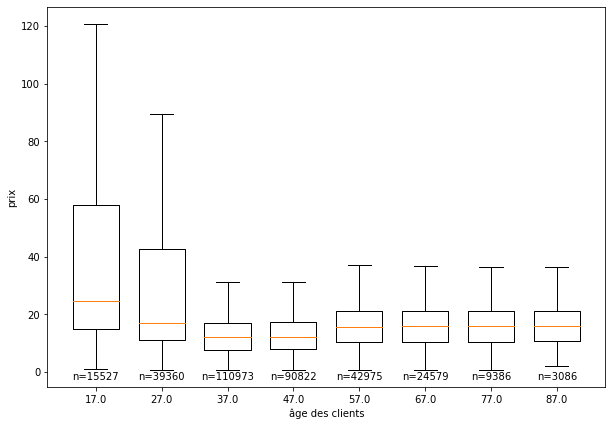

In [273]:
for ind, tr in enumerate(tranches): # pour chaque tranche, ind reçoit le numéro de tranche et tr la tranche en question
    prix = main_df.loc[indices==ind,"price"] # sélection des individus de la tranche ind
    if len(prix) > 0:
        g = {
            'valeurs': prix,
            'centre_classe': tr-(taille_classe/2),
            'taille': len(prix),
            'quartiles': [np.percentile(prix,p) for p in [25,50,75]]
        }
        groupes.append(g)

plt.figure(figsize=(10,7))
        
# affichage des boxplots
plt.boxplot([g["valeurs"] for g in groupes],
            positions= [g["centre_classe"] for g in groupes], # abscisses des boxplots
            showfliers= False, # on ne prend pas en compte les outliers
            widths= taille_classe*0.7) # largeur graphique des boxplots
plt.xlabel('âge des clients')
plt.ylabel('prix')
# affichage des effectifs de chaque classe
for g in groupes:
    plt.text(g["centre_classe"],0,f"n={g['taille']}",horizontalalignment='center',verticalalignment='top')
    
plt.savefig('correlation_age_prix_livres.png')
plt.show()



-  on peut observer que :
On ne constate pas de liaison entre le prix et l'âge des clients de façon globale mais on peut remarquer que :

Les clients les plus jeunes sont ceux qui achètent les livres les plus chers, avec une distribution probablement étalée vers la droite. Le prix median chez les moins de 23 ans est le plus elevé. 50% de cette tranche d'âge payent plus cher qu'au moins 75% de toutes les autres tranches d'âges. On observe aussi une importante volatilité du panier moyen par clients dans cette catégorie d'âge alors qu'elle est plus stable dans les tranches plus élevées, dû au fait que les disparités de revenus sont probablement plus marquées pour les plus jeunes.

Le prix médian est relativement stable dans toutes les autres tranches d'âges, même si elle augmente légèrement après 50 ans, les populations entre 30 et 45 sont ceux qui depensent le moins mais ils constitutent la tranche d'âge la plus importante des clients (en terme de transaction)


### <a> - Correlation âge des clients et montant total des achats </a>

In [274]:
main_df.isnull().sum()

id_prod        0
date           0
session_id     0
client_id      0
price          0
categ          0
first_merge    0
sex            0
birth          0
_merge         0
age            0
dtype: int64

In [275]:
main_df.groupby('age')[['price']].sum()


,price
age,
17,240669.91
18,127250.03
19,90586.54
20,83495.81
21,80124.87
...,...
89,2887.61
90,1664.94
91,1809.92


In [276]:
df_age_montant_achats = main_df.groupby('age')[['price']].sum().reset_index()
df_age_montant_achats


,age,price
0,17,240669.91
1,18,127250.03
2,19,90586.54
3,20,83495.81
4,21,80124.87
...,...,...
72,89,2887.61
73,90,1664.94
74,91,1809.92
75,92,1332.17


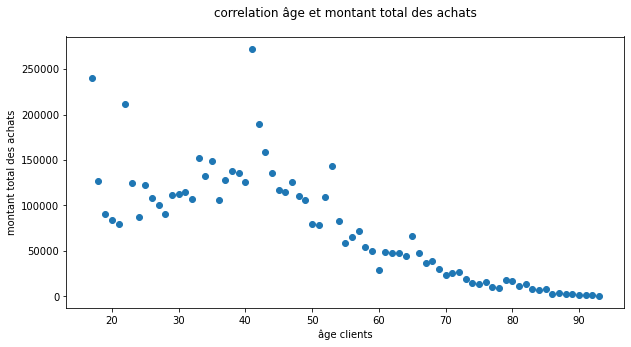

In [277]:
plt.figure(figsize=(10, 5))
plt.plot(df_age_montant_achats['age'], df_age_montant_achats['price'], 'o')
plt.title('correlation âge et montant total des achats', y=1.05)
plt.xlabel('âge clients')
plt.ylabel('montant total des achats')
plt.savefig('correlation_age_montant_total_achats_scatter.png')
plt.show()


- On n'observe pas de correlation entre l'age des clients et le montant total des achats. Toutefois, à partir de 40 ans, on observe une tendance à la baisse du montant total des achats à mesure que l'age augmente. De même entre 18 et 40 ans, le total moyen des achats semble augmenter avec l'age.

In [278]:
taille_classe = 10 # taille des classes pour la discrétisation
taille_classe = float(taille_classe)

groupes = [] # va recevoir les données agrégées à afficher

# on calcule des tranches allant de l'age minimum à l'age maximum par paliers d'âge taille_classe
tranches = np.arange(min(df_age_montant_achats["age"]), max(df_age_montant_achats["age"]), taille_classe)

tranches += taille_classe/2 # on décale les tranches d'une demi taille de classe

indices = np.digitize(df_age_montant_achats["age"], tranches) # associe chaque age à son numéro de classe


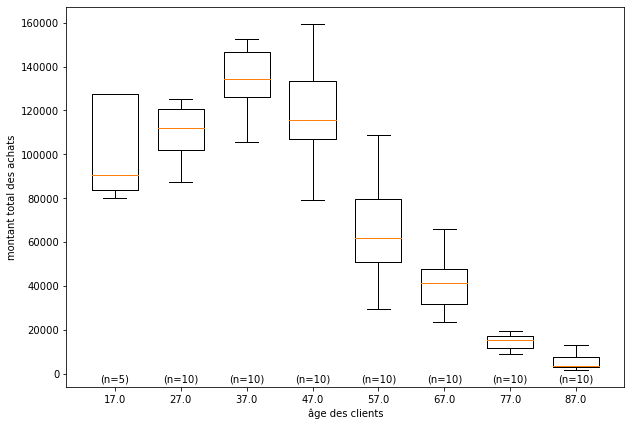

In [279]:
for ind, tr in enumerate(tranches): # pour chaque tranche, ind reçoit le numéro de tranche et tr la tranche en question
    prix = df_age_montant_achats.loc[indices==ind,"price"] # sélection des individus de la tranche ind
    if len(prix) > 0:
        g = {
            'valeurs': prix,
            'centre_classe': tr-(taille_classe/2),
            'taille': len(prix),
            'quartiles': [np.percentile(prix,p) for p in [25,50,75]]
        }
        groupes.append(g)

plt.figure(figsize=(10,7))
        
# affichage des boxplots
plt.boxplot([g["valeurs"] for g in groupes],
            positions= [g["centre_classe"] for g in groupes], # abscisses des boxplots
            showfliers= False, # on ne prend pas en compte les outliers
            widths= taille_classe*0.7) # largeur graphique des boxplots
plt.xlabel('âge des clients')
plt.ylabel('montant total des achats')
# affichage des effectifs de chaque classe
for g in groupes:
    plt.text(g["centre_classe"],0,"(n={})".format(g["taille"]),horizontalalignment='center',verticalalignment='top') 
    
plt.savefig('correlation_age_montant_total_achats_boxplot.png')    
plt.show()



- Après 40 ans: le montant total des achats diminue avec l'âge
  
- variabilité la plus élevée entre 40 et 60 ans

- les dépenses des individus entre 70 et 90 ans sont assez homogènes (depenses cumulées proches

- Les plus jeunes dépensesnt le plus, avec un pic d'achat cumulé pour les trentenaires (mediane la plus élevée)


In [280]:
# Verfifions ces hypothèses avec le calcul des corrélations
# Cas ou la population a moins de 45 ans
print(st.pearsonr(df_age_montant_achats.loc[df_age_montant_achats["age"] < 45, 'age'],df_age_montant_achats.loc[df_age_montant_achats["age"] < 45, 'price'])[0])


0.2544158517756983


In [281]:
# Verfifions ces hypothèses avec le calcul des corrélations
# Cas ou la population a plus de 45 ans
print(st.pearsonr(df_age_montant_achats.loc[df_age_montant_achats["age"] > 45, 'age'],df_age_montant_achats.loc[df_age_montant_achats["age"] > 45, 'price'])[0])

print("on observe une corrélation négative significative pour cette tranche de la population")


-0.9090584774559702
on observe une corrélation négative significative pour cette tranche de la population


In [282]:
# Verfifions ces hypothèses avec le calcul des corrélations (au global)
print(st.pearsonr(df_age_montant_achats["age"],df_age_montant_achats["price"])[0])


-0.8205240292896485


### <a> - Correlation age/taille du panier moyen
    

In [283]:
main_df.head()

,id_prod,date,session_id,client_id,price,categ,first_merge,sex,birth,_merge,age
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,both,f,1977,both,44
1,0_1085,2021-09-29 11:14:59.793823,s_97382,c_4450,3.99,0.0,both,f,1977,both,44
2,0_1453,2021-08-27 19:50:46.796939,s_81509,c_4450,7.99,0.0,both,f,1977,both,44
3,0_1405,2021-08-27 20:07:25.878440,s_81509,c_4450,4.99,0.0,both,f,1977,both,44
4,0_1392,2021-12-28 11:45:04.072281,s_141302,c_4450,6.30,0.0,both,f,1977,both,44


In [284]:
test = main_df[(main_df['session_id'] == 's_18746') | (main_df['session_id'] == 's_141302')]
test

,id_prod,date,session_id,client_id,price,categ,first_merge,sex,birth,_merge,age
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,both,f,1977,both,44
4,0_1392,2021-12-28 11:45:04.072281,s_141302,c_4450,6.30,0.0,both,f,1977,both,44
17,1_685,2021-04-10 18:25:09.319011,s_18746,c_4450,15.99,1.0,both,f,1977,both,44
65,0_1395,2021-04-10 18:32:27.342375,s_18746,c_4450,3.99,0.0,both,f,1977,both,44


In [285]:
test.groupby('session_id').count()

,id_prod,date,client_id,price,categ,first_merge,sex,birth,_merge,age
session_id,,,,,,,,,,
s_141302,1,1,1,1,1,1,1,1,1,1
s_18746,3,3,3,3,3,3,3,3,3,3


In [286]:
test.groupby('session_id').count().mean()

id_prod        2.0
date           2.0
client_id      2.0
price          2.0
categ          2.0
first_merge    2.0
sex            2.0
birth          2.0
_merge         2.0
age            2.0
dtype: float64

In [287]:
# determiner le nombre de commande par session pour chaque client
df_article_session = main_df.groupby(['client_id', 'session_id'], as_index=False)[['id_prod', 'age']].agg({'id_prod': 'count', 'age':'mean'})
df_article_session

,client_id,session_id,id_prod,age
0,c_1,s_105105,1,66.0
1,c_1,s_114737,5,66.0
2,c_1,s_120172,2,66.0
3,c_1,s_134971,1,66.0
4,c_1,s_136532,1,66.0
...,...,...,...,...
169189,c_999,s_88239,1,57.0
169190,c_999,s_89648,1,57.0
169191,c_999,s_92374,1,57.0
169192,c_999,s_98289,1,57.0


In [288]:
# focus sur le client c_1 en vue de vérifier les données
df_article_session.rename(columns={'id_prod' : 'panier moyen'}, inplace=True)
df_article_session.head(17)

,client_id,session_id,panier moyen,age
0,c_1,s_105105,1,66.0
1,c_1,s_114737,5,66.0
2,c_1,s_120172,2,66.0
3,c_1,s_134971,1,66.0
4,c_1,s_136532,1,66.0
5,c_1,s_139610,1,66.0
6,c_1,s_158128,1,67.0
7,c_1,s_47346,1,66.0
8,c_1,s_65433,1,66.0
9,c_1,s_66947,1,66.0


In [289]:
# verifions que l'âge peut évoluer entre deux commandes
main_df[(main_df['client_id'] == 'c_1') & (main_df['session_id'] == 's_158128') | (main_df['session_id'] == 's_105105')]


,id_prod,date,session_id,client_id,price,categ,first_merge,sex,birth,_merge,age
308563,0_1571,2022-02-01 01:47:04.355850,s_158128,c_1,5.99,0.0,both,m,1955,both,67
308569,0_1429,2021-10-15 11:28:24.523566,s_105105,c_1,7.99,0.0,both,m,1955,both,66


In [290]:
df_panier_moyen_par_age  = df_article_session.groupby('client_id')[['panier moyen', 'age']].agg({'panier moyen':'mean', 'age':'mean'})
df_panier_moyen_par_age

,panier moyen,age
client_id,,
c_1,1.333333,66.066667
c_10,1.750000,65.000000
c_100,2.000000,29.000000
c_1000,1.333333,55.214286
c_1001,2.416667,39.166667
...,...,...
c_995,1.600000,66.000000
c_996,1.166667,51.111111
c_997,2.300000,27.100000


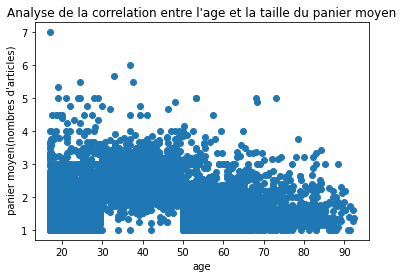

In [291]:
plt.figure()
plt.scatter(df_panier_moyen_par_age['age'], df_panier_moyen_par_age['panier moyen'])
plt.xlabel('age')
plt.ylabel(" panier moyen(nombres d\'articles)")
plt.title('Analyse de la correlation entre l\'age et la taille du panier moyen')
plt.savefig('correlation_age_taille_panier_moyen.png') 
plt.show()

- On n'observe aucune correlation entre l'âge et la taille du panier moyen.

In [292]:
# Calcul du coefficient de pearson
print(f"le coefficient de Pearson vaut: {st.pearsonr(df_panier_moyen_par_age['age'], df_panier_moyen_par_age['panier moyen'])[0]}")


le coefficient de Pearson vaut: -0.2278229605142736


### <a> - Correlation sex/catégorie des produits achetés

In [293]:
main_df.head()

,id_prod,date,session_id,client_id,price,categ,first_merge,sex,birth,_merge,age
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,both,f,1977,both,44
1,0_1085,2021-09-29 11:14:59.793823,s_97382,c_4450,3.99,0.0,both,f,1977,both,44
2,0_1453,2021-08-27 19:50:46.796939,s_81509,c_4450,7.99,0.0,both,f,1977,both,44
3,0_1405,2021-08-27 20:07:25.878440,s_81509,c_4450,4.99,0.0,both,f,1977,both,44
4,0_1392,2021-12-28 11:45:04.072281,s_141302,c_4450,6.30,0.0,both,f,1977,both,44


In [294]:
main_df.isnull().sum()


id_prod        0
date           0
session_id     0
client_id      0
price          0
categ          0
first_merge    0
sex            0
birth          0
_merge         0
age            0
dtype: int64

In [295]:
df_sex_cat = main_df[['sex', 'categ']]
df_sex_cat.shape


(336816, 2)

In [296]:
cont_sex_cat = df_sex_cat.pivot_table(index='sex', columns='categ', aggfunc=len, margins=True, margins_name='Total')
cont_sex_cat

categ,0.0,1.0,2.0,Total
sex,,,,
f,103846,55469,8260,167575
m,105683,54266,9292,169241
Total,209529,109735,17552,336816


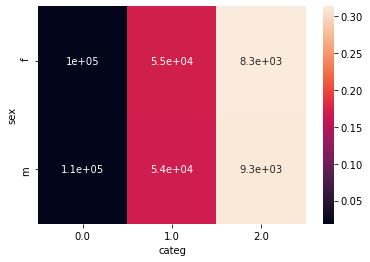

le khi-deux vaut : 81.73335807676145 a rapprocher à un seuil de
significativité pour conclure sur une hypothèse de dépendance ou non.

Indépendamment du genre, les clients achètent majoritairement
les produits de categorie 0, puis les catégorie 1 et 2.

On n'observe à priori pas de dépendance entre le sexe et la catégorie d'achat ei la categorie d'achat ne varie pas avec le sexe


In [297]:
import seaborn as sns

tx = cont_sex_cat.loc[:,["Total"]]
ty = cont_sex_cat.loc[["Total"],:]
n = len(df_sex_cat)
indep = tx.dot(ty) / n

measure = (cont_sex_cat-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n 
sns.heatmap(table.iloc[:-1,:-1],annot=cont_sex_cat.iloc[:-1,:-1])
plt.show()

print(f"le khi-deux vaut : {xi_n} a rapprocher à un seuil de\nsignificativité pour conclure sur une hypothèse de dépendance ou non.\n")
print("Indépendamment du genre, les clients achètent majoritairement\nles produits de categorie 0, puis les catégorie 1 et 2.\n")
print("On n'observe à priori pas de dépendance entre le sexe et la catégorie d'achat ei la categorie d'achat ne varie pas avec le sexe")


### <a> - Age des clients et frequence d'achats </a>

In [298]:
main_df.head(2)

,id_prod,date,session_id,client_id,price,categ,first_merge,sex,birth,_merge,age
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,both,f,1977,both,44
1,0_1085,2021-09-29 11:14:59.793823,s_97382,c_4450,3.99,0.0,both,f,1977,both,44


In [299]:
main_df['age'].min()

17

In [300]:
main_df['month'] = main_df['date'].dt.month_name()

/var/folders/b5/6wc9kpm138l0bt8lxhymh7l00000gn/T/ipykernel_17553/3276781147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['month'] = main_df['date'].dt.month_name()


In [301]:
main_df

,id_prod,date,session_id,client_id,price,categ,first_merge,sex,birth,_merge,age,month
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,both,f,1977,both,44,April
1,0_1085,2021-09-29 11:14:59.793823,s_97382,c_4450,3.99,0.0,both,f,1977,both,44,September
2,0_1453,2021-08-27 19:50:46.796939,s_81509,c_4450,7.99,0.0,both,f,1977,both,44,August
3,0_1405,2021-08-27 20:07:25.878440,s_81509,c_4450,4.99,0.0,both,f,1977,both,44,August
4,0_1392,2021-12-28 11:45:04.072281,s_141302,c_4450,6.30,0.0,both,f,1977,both,44,December
...,...,...,...,...,...,...,...,...,...,...,...,...
336813,1_607,2021-09-25 07:26:00.224331,s_95185,c_4786,26.99,1.0,both,f,1967,both,54,September
336814,1_673,2021-06-01 00:49:49.781631,s_42350,c_2793,12.99,1.0,both,m,1933,both,88,June
336815,0_2075,2021-10-09 09:03:48.268536,s_102200,c_2793,8.99,0.0,both,m,1933,both,88,October
336816,0_1692,2021-09-15 19:42:08.596375,s_90430,c_4478,13.36,0.0,both,f,1970,both,51,September


In [302]:
freq_achat_mensuel = main_df.groupby(['month', 'client_id'], as_index=False)[['session_id']].count()
freq_achat_mensuel

,month,client_id,session_id
0,April,c_10,7
1,April,c_100,1
2,April,c_1000,1
3,April,c_1001,5
4,April,c_1002,2
...,...,...,...
68029,September,c_991,8
68030,September,c_992,2
68031,September,c_997,7
68032,September,c_998,1


In [303]:
freq_achat_mensuel = freq_achat_mensuel.merge(main_df[['client_id', 'age']], how='left', on='client_id', indicator=True)
freq_achat_mensuel

,month,client_id,session_id,age,_merge
0,April,c_10,7,65,both
1,April,c_10,7,65,both
2,April,c_10,7,65,both
3,April,c_10,7,65,both
4,April,c_10,7,65,both
...,...,...,...,...,...
3414050,September,c_999,5,58,both
3414051,September,c_999,5,57,both
3414052,September,c_999,5,58,both
3414053,September,c_999,5,57,both


In [304]:
freq_achat_mensuel = freq_achat_mensuel.groupby(['month', 'client_id']).agg({'age': 'mean', 'session_id': 'mean'})
freq_achat_mensuel

age  session_id
month     client_id                       
April     c_10       65.000000           7
          c_100      29.000000           1
          c_1000     55.250000           1
          c_1001     39.155172           5
          c_1002     39.166667           2
...                        ...         ...
September c_991      43.192308           8
          c_992      44.083333           2
          c_997      27.173913           7
          c_998      20.142857           1
          c_999      57.227273           5

[68034 rows x 2 columns]

In [305]:
freq_achat_mensuel.rename(columns={'session_id': 'frequence d\'achat'}, inplace=True)
freq_achat_mensuel

age  frequence d'achat
month     client_id                              
April     c_10       65.000000                  7
          c_100      29.000000                  1
          c_1000     55.250000                  1
          c_1001     39.155172                  5
          c_1002     39.166667                  2
...                        ...                ...
September c_991      43.192308                  8
          c_992      44.083333                  2
          c_997      27.173913                  7
          c_998      20.142857                  1
          c_999      57.227273                  5

[68034 rows x 2 columns]

In [306]:
freq_achat_mensuel.sort_values(by='frequence d\'achat', ascending=False).head(10)


,,age,frequence d'achat
month,client_id,,
September,c_1609,41.162194,1428
December,c_1609,41.162194,1287
May,c_1609,41.162194,1132
April,c_1609,41.162194,1091
March,c_1609,41.162194,1083
February,c_1609,41.162194,1074
November,c_1609,41.162194,1057
October,c_1609,41.162194,1016
January,c_1609,41.162194,1011


In [307]:
main_df[(main_df['client_id'] == 'c_10') & (main_df['month'] == 'April')].count()

id_prod        7
date           7
session_id     7
client_id      7
price          7
categ          7
first_merge    7
sex            7
birth          7
_merge         7
age            7
month          7
dtype: int64

In [308]:
main_df[(main_df['client_id'] == 'c_10') & (main_df['month'] == 'April')].count()

id_prod        7
date           7
session_id     7
client_id      7
price          7
categ          7
first_merge    7
sex            7
birth          7
_merge         7
age            7
month          7
dtype: int64

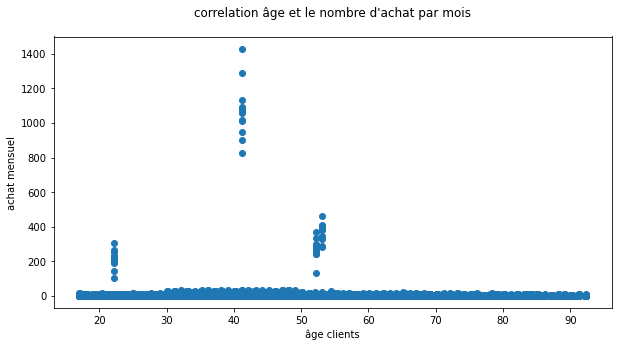

In [309]:
plt.figure(figsize=(10, 5))
plt.plot(freq_achat_mensuel['age'], freq_achat_mensuel['frequence d\'achat'], 'o')
plt.title('correlation âge et le nombre d\'achat par mois', y=1.05)
plt.xlabel('âge clients')
plt.ylabel('achat mensuel')
plt.savefig('correlation_age_frequencedachat_scatter.png')
plt.show()


- Il n'y a pas de liaison entre l'âge des clients et la fréquence d'achat par mois

In [310]:
freq_achat_mensuel.head()
                                                                                  

age  frequence d'achat
month client_id                              
April c_10       65.000000                  7
      c_100      29.000000                  1
      c_1000     55.250000                  1
      c_1001     39.155172                  5
      c_1002     39.166667                  2

In [311]:
freq_achat_mensuel[freq_achat_mensuel['frequence d\'achat'] < 100]

age  frequence d'achat
month     client_id                              
April     c_10       65.000000                  7
          c_100      29.000000                  1
          c_1000     55.250000                  1
          c_1001     39.155172                  5
          c_1002     39.166667                  2
...                        ...                ...
September c_991      43.192308                  8
          c_992      44.083333                  2
          c_997      27.173913                  7
          c_998      20.142857                  1
          c_999      57.227273                  5

[67986 rows x 2 columns]

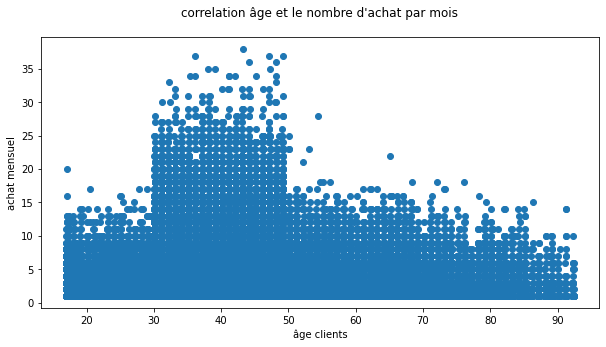

In [312]:
# Analyse de la correlation lorsque la frequence d'achat est à moins de 100 commandes par mois
plt.figure(figsize=(10, 5))
plt.plot(freq_achat_mensuel[freq_achat_mensuel['frequence d\'achat'] < 100]['age'], freq_achat_mensuel[freq_achat_mensuel['frequence d\'achat'] < 100]['frequence d\'achat'], 'o')
plt.title('correlation âge et le nombre d\'achat par mois', y=1.05)
plt.xlabel('âge clients')
plt.ylabel('achat mensuel')
plt.savefig('correlation_age_frequencedachat_scatter_lt100.png')
plt.show()


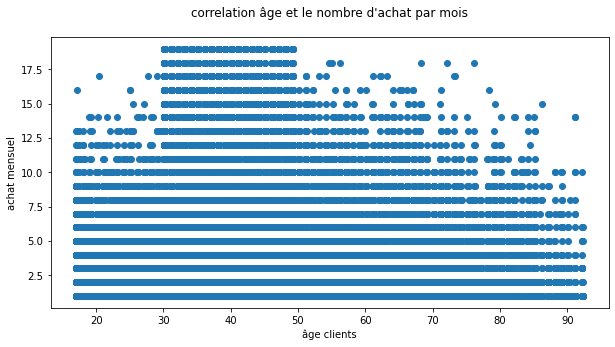

In [313]:
# Analyse de la correlation lorsque la frequence d'achat est à moins de 10 commandes par mois
plt.figure(figsize=(10, 5))
plt.plot(freq_achat_mensuel[freq_achat_mensuel['frequence d\'achat'] < 20]['age'], freq_achat_mensuel[freq_achat_mensuel['frequence d\'achat'] < 20]['frequence d\'achat'], 'o')
plt.title('correlation âge et le nombre d\'achat par mois', y=1.05)
plt.xlabel('âge clients')
plt.ylabel('achat mensuel')
plt.savefig('correlation_age_frequencedachat_scatter_lt20.png')
plt.show()


In [314]:
# Calcul du coeff de corr linéaire et de la Covariance
coefpearson_freq_achat = st.pearsonr(freq_achat_mensuel['age'], freq_achat_mensuel['frequence d\'achat'])[0] 
print("coefpearson_freq_achat :" , coefpearson_birthPrice) # pas de correlation
print("covariance: " , np.cov(main_df['birth'], main_df['price'],ddof=0)[1,0])


coefpearson_freq_achat : 0.2115049794654293
covariance:  51.066508222675495


### <a> - Correlation âge et  categories des produits achetés </a>

In [315]:
main_df.head(3)

,id_prod,date,session_id,client_id,price,categ,first_merge,sex,birth,_merge,age,month
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,both,f,1977,both,44,April
1,0_1085,2021-09-29 11:14:59.793823,s_97382,c_4450,3.99,0.0,both,f,1977,both,44,September
2,0_1453,2021-08-27 19:50:46.796939,s_81509,c_4450,7.99,0.0,both,f,1977,both,44,August


In [316]:
main_df[['age', 'categ']]

,age,categ
0,44,0.0
1,44,0.0
2,44,0.0
3,44,0.0
4,44,0.0
...,...,...
336813,54,1.0
336814,88,1.0
336815,88,0.0
336816,51,0.0


In [317]:
main_df['categ'].value_counts()

0.0    209529
1.0    109735
2.0     17552
Name: categ, dtype: int64

In [318]:
a = main_df['categ'].value_counts().values
a

array([209529, 109735,  17552])

<Figure size 1152x360 with 0 Axes>

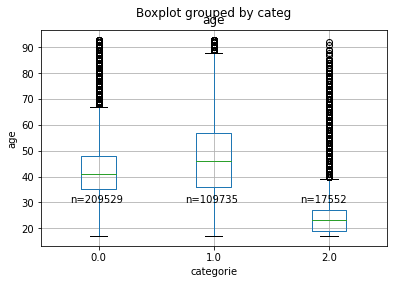

In [319]:
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

plt.figure(figsize=(16,5))
main_df[['age', 'categ']].boxplot(column='age', by='categ', meanprops=meanprops, showfliers=True)
plt.xlabel('categorie')
plt.ylabel('age')
plt.text(0.75,30,f"n={a[0]}")
plt.text(1.75,30,f"n={a[1]}")
plt.text(2.75,30,f"n={a[2]}")
plt.savefig('correlation_age_categorie.png') 
plt.show()


- Les clients les plus Jeunes (<30 ans) achètent beaucoup plus que les autres tranches d'âge les livres de catégories 2. La majorité des clients qui consomment les livres de categorie 2 à moins de 40 ans et 50% des clients de cette categorie de livres ont moins de 25 ans.

-  L'age median des consommateurs de la categorie 1 se situe aux alentours de 45 ans, celui de la categorie 0 aux alentours des 40 ans. La distribution des ages est donc un peu plus homogène entre les clients agés et moins agés pour ces deux categories, même si on observe une plus grande variabilité des âges pour la categorie 1 qui attirent aussi les consommateurs les plis âgés.

##### calculons le $\eta^2$ :

In [320]:
main_df_no_NaN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336816 entries, 0 to 336817
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   id_prod      336816 non-null  object        
 1   date         336816 non-null  datetime64[ns]
 2   session_id   336816 non-null  object        
 3   client_id    336816 non-null  object        
 4   price        336816 non-null  float64       
 5   categ        336816 non-null  float64       
 6   first_merge  336816 non-null  category      
 7   sex          336816 non-null  object        
 8   birth        336816 non-null  int64         
 9   _merge       336816 non-null  category      
 10  age          336816 non-null  int64         
dtypes: category(2), datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 26.3+ MB


In [321]:

X = "categ" # qualitative
Y = "age" # quantitative

def eta_squared(x,y):
    moyenne_y = x.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
print(f"The value of eta_squared is {eta_squared(main_df[X],main_df[Y])}")


The value of eta_squared is 0.920355024147472


In [322]:
main_df.head(3)

,id_prod,date,session_id,client_id,price,categ,first_merge,sex,birth,_merge,age,month
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,both,f,1977,both,44,April
1,0_1085,2021-09-29 11:14:59.793823,s_97382,c_4450,3.99,0.0,both,f,1977,both,44,September
2,0_1453,2021-08-27 19:50:46.796939,s_81509,c_4450,7.99,0.0,both,f,1977,both,44,August


In [323]:
main_df['session_id'].nunique()

169194

In [324]:
main_df['client_id'].nunique()

8600

In [325]:
main_df.shape

(336816, 12)